In [1]:
import numpy as np
import scipy.sparse as sp
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import scipy.linalg as scl
from sklearn.model_selection import train_test_split
import sklearn.linear_model as skl
import tqdm
from sklearn.utils import resample

#This line is written to obtain always the same random numbers
np.random.seed(12)
import warnings
#Comment this to turn on warnings
warnings.filterwarnings('ignore')

# Part a)

In [2]:
### Define Ising model parameters in one dimension

#Each configuration has 40 spins and we create 10^4 different coffigurations
L = 40
n = int(1e4)

#A matrix with a size n x L is filled randomly with 1 and -1 (the two different states for the spin)
spins = np.random.choice([-1, 1], size=(n, L))

#We assume that the coupling constant is equal to 1
J = 1.0

#We calculate the energies of the different configurations assuming that only the  spins can interact with their neighbors
energies = np.zeros(n)

for i in range(n):
    energies[i] = - J * np.dot(spins[i], np.roll(spins[i], 1))

# Part b)

In [3]:
#Definition of the design matrix
X = np.zeros((n, L ** 2))

#We assume that all the spins can interact between all the others (not only with the neighbors)
for i in range(n):
    X[i] = np.outer(spins[i], spins[i]).ravel()

#We change the shape of the energy vector from (n,) to (n)    
y = energies.reshape(-1, 1)

#We split the design matrix and the energy vector between train (80%) and test (20%) data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.96)


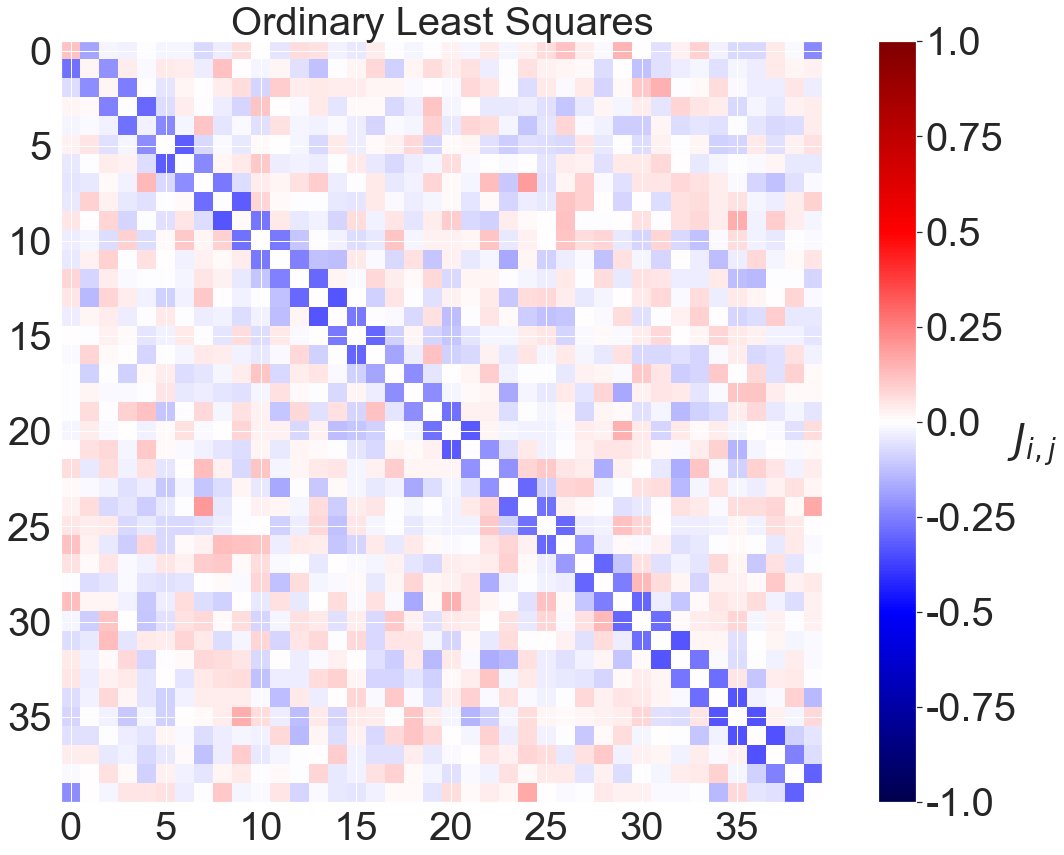

In [4]:
sns.set(color_codes=True)
cmap_args=dict(vmin=-1., vmax=1., cmap='seismic')

#Calculation of the coupling constant by Ordinary Least Squares (OLS)
clf = skl.LinearRegression().fit(X_train, y_train)

#We reshape the results in a matrix with a size L x L to plot and study them easily
J_sk = clf.coef_.reshape(L, L)

#Plot and save the obtained results
fig = plt.figure(figsize=(20, 14))
im = plt.imshow(J_sk, **cmap_args)
plt.title("Ordinary Least Squares", fontsize=40)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
cb = fig.colorbar(im)
cb.ax.set_yticklabels(cb.ax.get_yticklabels(), fontsize=40)
 
cb.ax.set_yticklabels(np.arange(-1.0, 1.0+0.25, 0.25),fontsize=40)
cb.set_label('$J_{i,j}$',labelpad=15, y=0.5,fontsize=40,rotation=0)

plt.show()
fig.savefig("Colormap_OLS.png")

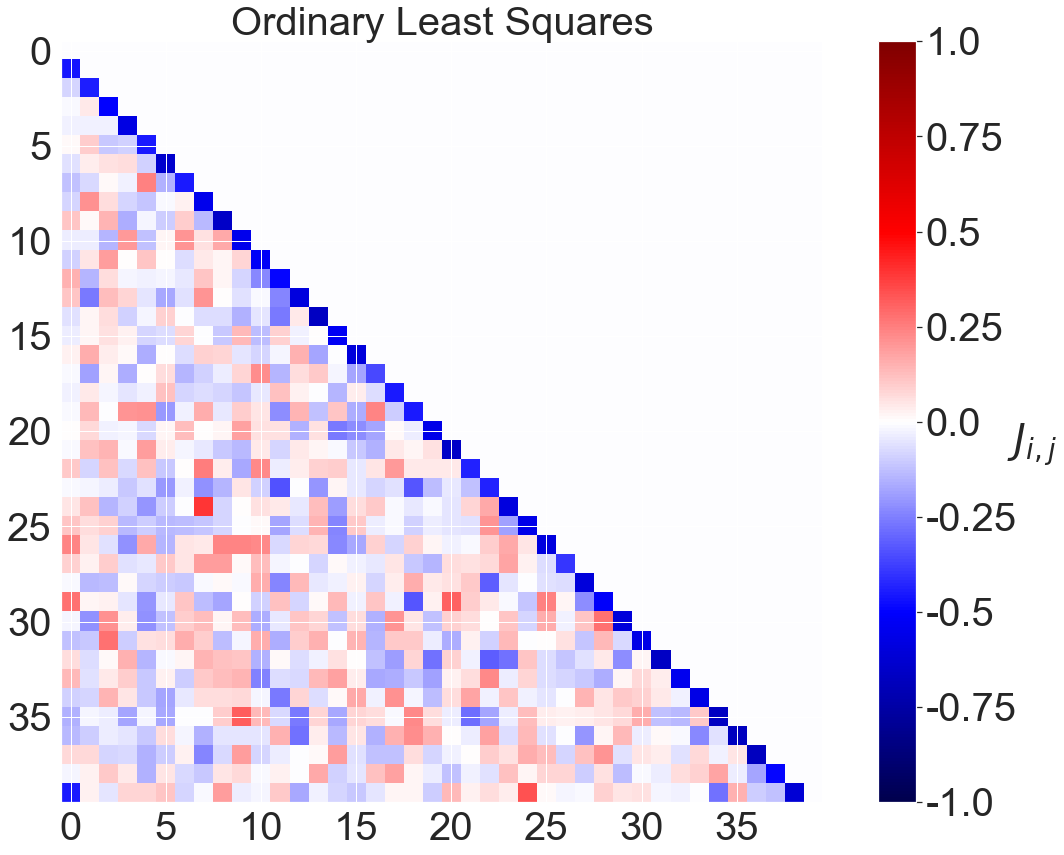

In [5]:
#Summing the constants J[i,j] and J[j,i] which correspond to the same interaction.
J_OLS = np.zeros((L, L))
for i in range(0,L):
    for j in range(0,i):
        if i != j:
            J_OLS[i,j] = J_sk[i,j] + J_sk[j,i]

#Plot and save the obtained results
fig = plt.figure(figsize=(20, 14))
im = plt.imshow(J_OLS, **cmap_args)
plt.title("Ordinary Least Squares", fontsize=40)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
cb = fig.colorbar(im)
cb.ax.set_yticklabels(cb.ax.get_yticklabels(), fontsize=18)
 
cb.ax.set_yticklabels(np.arange(-1.0, 1.0+0.25, 0.25),fontsize=40)
cb.set_label('$J_{i,j}$',labelpad=15, y=0.5,fontsize=40,rotation=0)

plt.show()
fig.savefig("Colormap_OLS2.png")

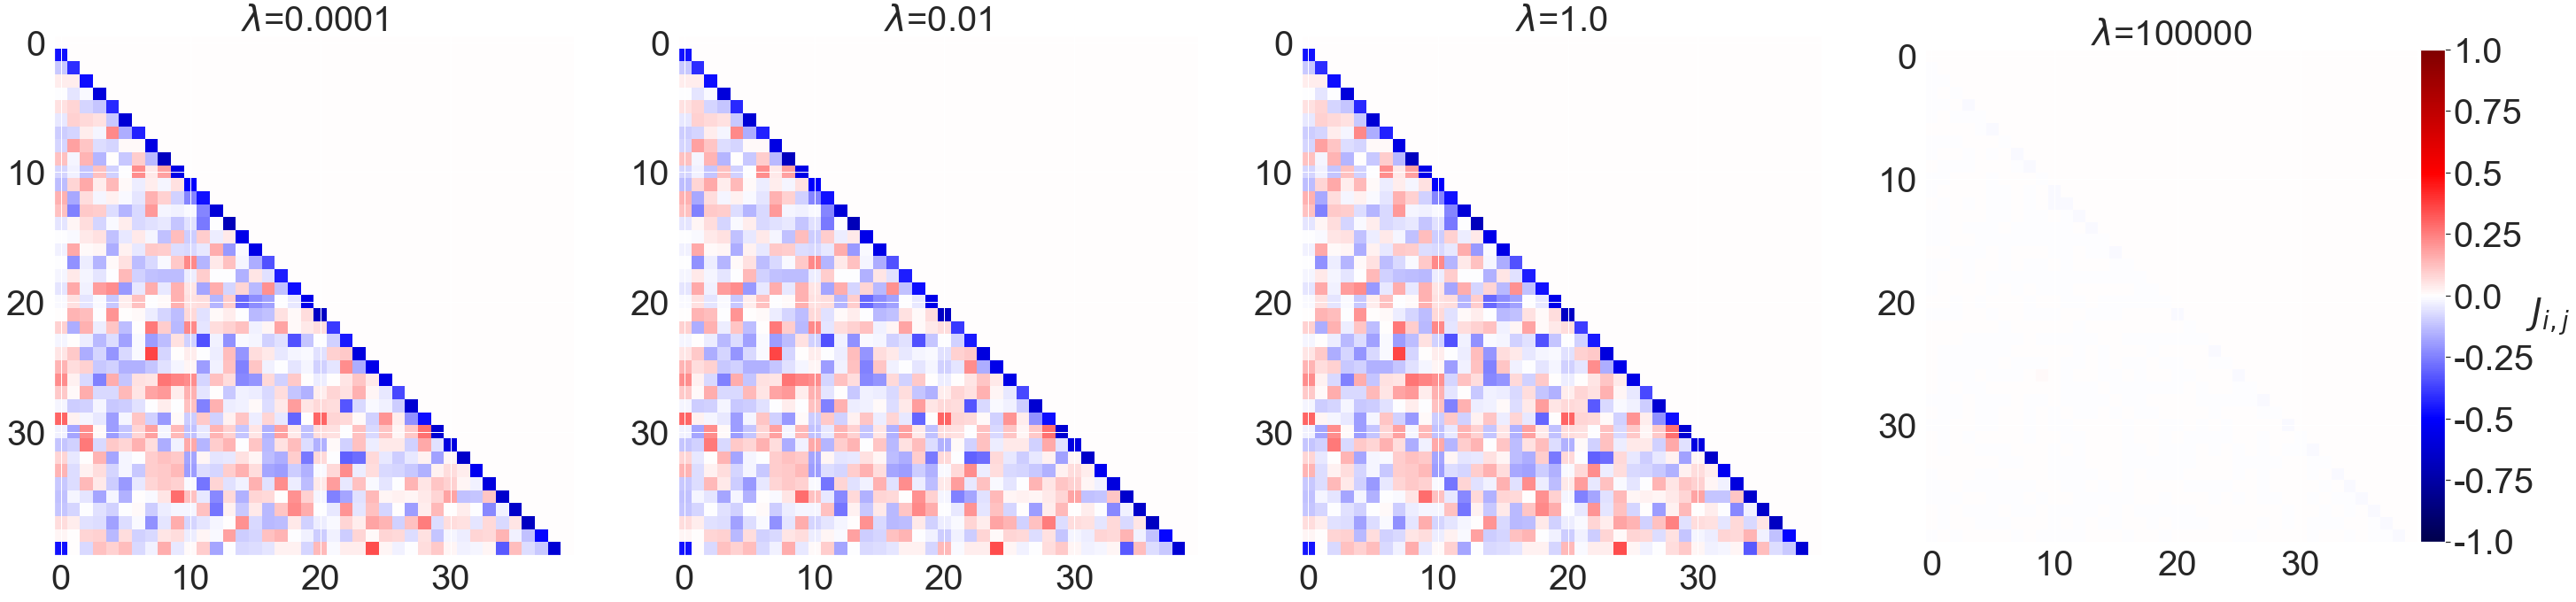

In [6]:
#Calculation of the coupling constant by Ridge regression
fig, axarr = plt.subplots(nrows=1, ncols=4, figsize=(20,20))

#Calculation for lambda=10^-4
_lambda = 1e-4
clf_ridge = skl.Ridge(alpha=_lambda).fit(X_train, y_train)
J_ridge_sk = clf_ridge.coef_.reshape(L, L)

J_ridge = np.zeros((L, L))
for i in range(0,L):
    for j in range(0,i):
        if i != j:
            J_ridge[i,j] = J_ridge_sk[i,j] + J_ridge_sk[j,i]

im = axarr[0].imshow(J_ridge, **cmap_args)
axarr[0].set_title('$\\lambda$=%.4f' %(_lambda), fontsize=40)
axarr[0].tick_params(labelsize=40)


#Calculation for lambda=10^-2
_lambda = 1e-2
clf_ridge = skl.Ridge(alpha=_lambda).fit(X_train, y_train)
J_ridge_sk = clf_ridge.coef_.reshape(L, L)

J_ridge = np.zeros((L, L))
for i in range(0,L):
    for j in range(0,i):
        if i != j:
            J_ridge[i,j] = J_ridge_sk[i,j] + J_ridge_sk[j,i]

im = axarr[1].imshow(J_ridge, **cmap_args)
axarr[1].set_title('$\\lambda$=%.2f' %(_lambda), fontsize=40)
axarr[1].tick_params(labelsize=40)


#Calculation for lambda=1
_lambda = 1
clf_ridge = skl.Ridge(alpha=_lambda).fit(X_train, y_train)
J_ridge_sk = clf_ridge.coef_.reshape(L, L)

J_ridge = np.zeros((L, L))
for i in range(0,L):
    for j in range(0,i):
        if i != j:
            J_ridge[i,j] = J_ridge_sk[i,j] + J_ridge_sk[j,i]

im = axarr[2].imshow(J_ridge, **cmap_args)
axarr[2].set_title('$\\lambda$=%.1f' %(_lambda), fontsize=40)
axarr[2].tick_params(labelsize=40)


#Calculation for lambda=10^5
_lambda = 1e5
clf_ridge = skl.Ridge(alpha=_lambda).fit(X_train, y_train)
J_ridge_sk = clf_ridge.coef_.reshape(L, L)

J_ridge = np.zeros((L, L))
for i in range(0,L):
    for j in range(0,i):
        if i != j:
            J_ridge[i,j] = J_ridge_sk[i,j] + J_ridge_sk[j,i]

im = axarr[3].imshow(J_ridge, **cmap_args)
axarr[3].set_title('$\\lambda$=%i' %(_lambda), fontsize=40)
axarr[3].tick_params(labelsize=40)


divider = make_axes_locatable(axarr[3])
cax = divider.append_axes("right", size="5%", pad=0.05, add_to_figure=True)
cb=fig.colorbar(im, cax=cax)
cb.ax.set_yticklabels(cb.ax.get_yticklabels(), fontsize=40)
    
cb.ax.set_yticklabels(np.arange(-1.0, 1.0+0.25, 0.25),fontsize=40)
cb.set_label('$J_{i,j}$',labelpad=15, y=0.5,fontsize=40,rotation=0)
    
fig.subplots_adjust(right=2.0)

plt.show()
fig.savefig("Colormap_Ridge.png")

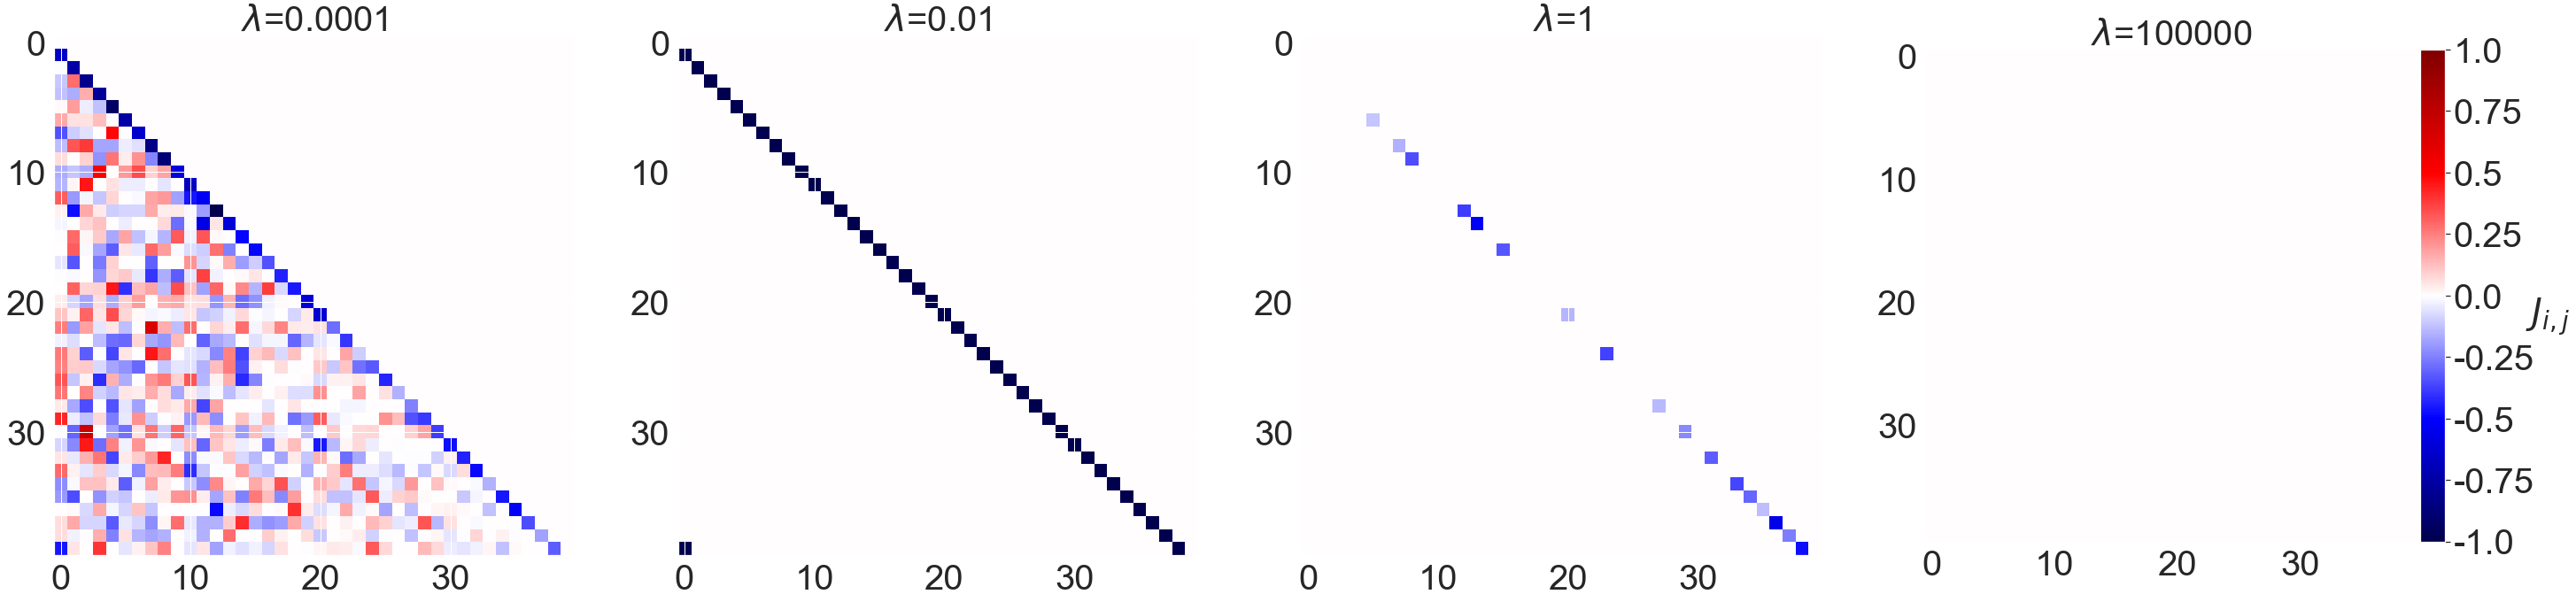

In [7]:
#Calculation of the coupling constant by Lasso regression
fig, axarr = plt.subplots(nrows=1, ncols=4, figsize=(20,20))

#Calculation for lambda=10^-4
_lambda = 1e-4
clf_lasso = skl.Lasso(alpha=_lambda).fit(X_train, y_train)
J_lasso_sk = clf_lasso.coef_.reshape(L, L)

J_lasso = np.zeros((L, L))
for i in range(0,L):
    for j in range(0,i):
        if i != j:
            J_lasso[i,j] = J_lasso_sk[i,j] + J_lasso_sk[j,i]

im = axarr[0].imshow(J_lasso, **cmap_args)
axarr[0].set_title('$\\lambda$=%.4f' %(_lambda), fontsize=40)
axarr[0].tick_params(labelsize=40)


#Calculation for lambda=10^-2
_lambda = 1e-2
clf_lasso = skl.Lasso(alpha=_lambda).fit(X_train, y_train)
J_lasso_sk = clf_lasso.coef_.reshape(L, L)

J_lasso = np.zeros((L, L))
for i in range(0,L):
    for j in range(0,i):
        if i != j:
            J_lasso[i,j] = J_lasso_sk[i,j] + J_lasso_sk[j,i]

im = axarr[1].imshow(J_lasso, **cmap_args)
axarr[1].set_title('$\\lambda$=%.2f' %(_lambda), fontsize=40)
axarr[1].tick_params(labelsize=40)


#Calculation for lambda=1
_lambda = 1
clf_lasso = skl.Lasso(alpha=_lambda).fit(X_train, y_train)
J_lasso_sk = clf_lasso.coef_.reshape(L, L)

J_lasso = np.zeros((L, L))
for i in range(0,L):
    for j in range(0,i):
        if i != j:
            J_lasso[i,j] = J_lasso_sk[i,j] + J_lasso_sk[j,i]

im = axarr[2].imshow(J_lasso, **cmap_args)
axarr[2].set_title('$\\lambda$=%.f' %(_lambda), fontsize=40)
axarr[2].tick_params(labelsize=40)


#Calculation for lambda=10^5
_lambda = 1e5
clf_lasso = skl.Lasso(alpha=_lambda).fit(X_train, y_train)
J_lasso_sk = clf_lasso.coef_.reshape(L, L)

J_lasso = np.zeros((L, L))
for i in range(0,L):
    for j in range(0,i):
        if i != j:
            J_lasso[i,j] = J_lasso_sk[i,j] + J_lasso_sk[j,i]

im = axarr[3].imshow(J_lasso, **cmap_args)
axarr[3].set_title('$\\lambda$=%i' %(_lambda), fontsize=40)
axarr[3].tick_params(labelsize=40)


divider = make_axes_locatable(axarr[3])
cax = divider.append_axes("right", size="5%", pad=0.05, add_to_figure=True)
cb=fig.colorbar(im, cax=cax)
cb.ax.set_yticklabels(cb.ax.get_yticklabels(), fontsize=40)
    
cb.ax.set_yticklabels(np.arange(-1.0, 1.0+0.25, 0.25),fontsize=40)
cb.set_label('$J_{i,j}$',labelpad=15, y=0.5,fontsize=40,rotation=0)
    
fig.subplots_adjust(right=2.0)

plt.show()
fig.savefig("Colormap_Lasso.png")

In [8]:
#Dependence of R2 and MSE on lambda
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#Definition of different vectors for saving the results
maxdegree = 10
lam = np.zeros(maxdegree)

error_ridge_train = np.zeros(maxdegree)
R2_ridge_train = np.zeros(maxdegree)

error_lasso_train = np.zeros(maxdegree)
R2_lasso_train = np.zeros(maxdegree)

error_OLS_train = np.zeros(maxdegree)
R2_OLS_train = np.zeros(maxdegree)

error_ridge_test = np.zeros(maxdegree)
R2_ridge_test = np.zeros(maxdegree)

error_lasso_test = np.zeros(maxdegree)
R2_lasso_test = np.zeros(maxdegree)

error_OLS_test = np.zeros(maxdegree)
R2_OLS_test = np.zeros(maxdegree)


#Spliting the data between train (80%) and test (20%) data
x_train, x_test, y_train, y_test = train_test_split(spins, y, test_size=0.96)

#Definition of the test design matrix
X_test  = np.zeros((x_test.shape[0], L ** 2))
for i in range(len(x_test)):    
    X_test[i] = np.outer(x_test[i], x_test[i]).ravel()

#Definition of the train design matrix
X_train = np.zeros((x_train.shape[0], L ** 2))
for i in range(len(x_train)):    
    X_train[i] = np.outer(x_train[i], x_train[i]).ravel()

#Loop over the different values of lambda
for l in range(0, len(lam)):
    #Definition of the lambda value
    lamb=10**(-l+5)
    
    #Calculation of the coupling constant by Ridge regression
    clf_ridge = skl.Ridge(alpha=lamb).fit(X_train, y_train)
    J_ridge_sk = clf_ridge.coef_.ravel()
    
    #Calculation of the coupling constant by Lasso regression
    clf_lasso = skl.Lasso(alpha=lamb).fit(X_train, y_train)
    J_lasso_sk = clf_lasso.coef_.ravel()
    
    #Calculation of the coupling constant by OLS regression
    clf = skl.LinearRegression().fit(X_train, y_train)
    J_sk = clf.coef_.ravel()
    
    #Saving the predictions of the linear regression
    y_ridge_train = (X_train @ J_ridge_sk).ravel()
    y_lasso_train = (X_train @ J_lasso_sk).ravel()
    y_OLS_train = (X_train @ J_sk).ravel()
        
    y_ridge_test = (X_test @ J_ridge_sk).ravel()
    y_lasso_test = (X_test @ J_lasso_sk).ravel()
    y_OLS_test = (X_test @ J_sk).ravel()
             
    
    #Calculating the final results
    lam[l] = lamb
        
    n = np.size(y_ridge_train)
    error_ridge_train[l] = mean_squared_error(y_train, y_ridge_train)
    R2_ridge_train[l] = r2_score(y_train, y_ridge_train)
    
    error_lasso_train[l] = mean_squared_error(y_train, y_lasso_train)
    R2_lasso_train[l] = r2_score(y_train, y_lasso_train)
    
    error_OLS_train[l] = mean_squared_error(y_train, y_OLS_train)
    R2_OLS_train[l] = r2_score(y_train, y_OLS_train)
    
    error_ridge_test[l] = mean_squared_error(y_test, y_ridge_test)
    R2_ridge_test[l] = r2_score(y_test, y_ridge_test)
    
    error_lasso_test[l] = mean_squared_error(y_test, y_lasso_test)
    R2_lasso_test[l] = r2_score(y_test, y_lasso_test)
    
    error_OLS_test[l] = mean_squared_error(y_test, y_OLS_test)
    R2_OLS_test[l] = r2_score(y_test, y_OLS_test)

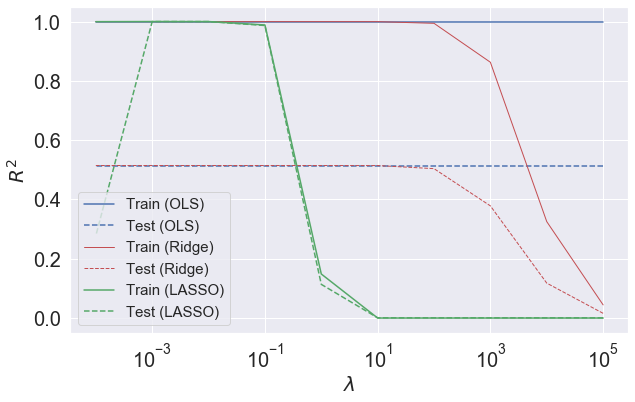

In [9]:
#Plot and save the results of R2 score
fig = plt.figure(figsize=(20, 20))
plt.semilogx(lam, R2_OLS_train, 'b',label='Train (OLS)')
plt.semilogx(lam, R2_OLS_test,'--b',label='Test (OLS)')
plt.semilogx(lam, R2_ridge_train,'r',label='Train (Ridge)',linewidth=1)
plt.semilogx(lam, R2_ridge_test,'--r',label='Test (Ridge)',linewidth=1)
plt.semilogx(lam, R2_lasso_train, 'g',label='Train (LASSO)')
plt.semilogx(lam, R2_lasso_test, '--g',label='Test (LASSO)')
fig = plt.gcf()
fig.set_size_inches(10.0, 6.0)
plt.xlabel('$\\lambda$',fontsize=20)
plt.ylabel(r'$R^2$',fontsize=20)
plt.tick_params(labelsize=20)
plt.legend(fontsize=15)
plt.show()
fig.savefig("R2.png")

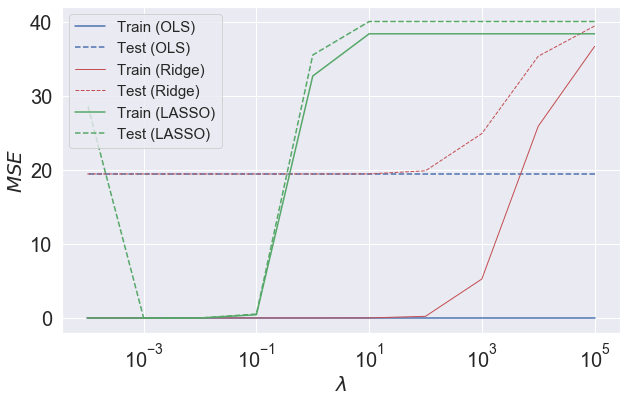

In [10]:
#Plot and save the results of MSE
fig = plt.figure(figsize=(20, 20))
plt.semilogx(lam, error_OLS_train, 'b',label='Train (OLS)')
plt.semilogx(lam, error_OLS_test,'--b',label='Test (OLS)')
plt.semilogx(lam, error_ridge_train,'r',label='Train (Ridge)',linewidth=1)
plt.semilogx(lam, error_ridge_test,'--r',label='Test (Ridge)',linewidth=1)
plt.semilogx(lam, error_lasso_train, 'g',label='Train (LASSO)')
plt.semilogx(lam, error_lasso_test, '--g',label='Test (LASSO)')
fig = plt.gcf()
fig.set_size_inches(10.0, 6.0)
plt.xlabel('$\\lambda$',fontsize=20)
plt.ylabel(r'$MSE$',fontsize=20)
plt.legend(fontsize=15)
plt.tick_params(labelsize=20)
plt.show()
fig.savefig("MSE.png")

In [11]:
#Bias-variance analysis using the bootstrap resampling method
#Number of bootstraps
n_boostraps = 50

#Number of lambdas to study
maxdegree = 10

#Definition of different vectors for saving the results
lam = np.zeros(maxdegree)

error_ridge_train = np.zeros(maxdegree)
bias_ridge_train = np.zeros(maxdegree)
variance_ridge_train = np.zeros(maxdegree)
R2_ridge_train = np.zeros(maxdegree)

error_lasso_train = np.zeros(maxdegree)
bias_lasso_train = np.zeros(maxdegree)
variance_lasso_train = np.zeros(maxdegree)
R2_lasso_train = np.zeros(maxdegree)

error_OLS_train = np.zeros(maxdegree)
bias_OLS_train = np.zeros(maxdegree)
variance_OLS_train = np.zeros(maxdegree)
R2_OLS_train = np.zeros(maxdegree)

error_ridge_test = np.zeros(maxdegree)
bias_ridge_test = np.zeros(maxdegree)
variance_ridge_test = np.zeros(maxdegree)
R2_ridge_test = np.zeros(maxdegree)

error_lasso_test = np.zeros(maxdegree)
bias_lasso_test = np.zeros(maxdegree)
variance_lasso_test = np.zeros(maxdegree)
R2_lasso_test = np.zeros(maxdegree)

error_OLS_test = np.zeros(maxdegree)
bias_OLS_test = np.zeros(maxdegree)
variance_OLS_test = np.zeros(maxdegree)
R2_OLS_test = np.zeros(maxdegree)

#Spliting the data between train (4%) and test (96%) data
x_train, x_test, y_train, y_test = train_test_split(spins, y, test_size=0.96)


#Definition of the test design matrix
X_test  = np.zeros((x_test.shape[0], L ** 2))
for i in range(len(x_test)):    
    X_test[i] = np.outer(x_test[i], x_test[i]).ravel()

#Definition of the train design matrix
X_train = np.zeros((x_train.shape[0], L ** 2))
for i in range(len(x_train)):    
    X_train[i] = np.outer(x_train[i], x_train[i]).ravel()

X_ = np.zeros((x_train.shape[0], L ** 2))

#Loop over the different values of lambda
for l in range(0, len(lam)):
    #Definition of the lambda value
    lamb=10**(-l+5)
    
    #Definition of matrix for saving the results of each bootstrap
    y_OLS_train = np.empty((x_train.shape[0], n_boostraps))
    y_ridge_train = np.empty((x_train.shape[0], n_boostraps))
    y_lasso_train = np.empty((x_train.shape[0], n_boostraps))
    
    y_OLS_test = np.empty((x_test.shape[0], n_boostraps))
    y_ridge_test = np.empty((x_test.shape[0], n_boostraps))
    y_lasso_test = np.empty((x_test.shape[0], n_boostraps))
    
    #Loop over the bootstraps
    for j in range(n_boostraps):
        #Resampling of the trainning data
        x_, y_, = resample(x_train, y_train)
        y_ = y_.ravel()
        
        #Definition of the desing matrix after the resampling
        for i in range(len(x_)):    
            X_[i] = np.outer(x_[i], x_[i]).ravel()
        
        #Calculation of the coupling constant by Ridge regression
        clf_ridge = skl.Ridge(alpha=lamb).fit(X_, y_)
        J_ridge_sk = clf_ridge.coef_.ravel()
        
        #Calculation of the coupling constant by Lasso regression
        clf_lasso = skl.Lasso(alpha=lamb).fit(X_, y_)
        J_lasso_sk = clf_lasso.coef_.ravel()
        
        #Calculation of the coupling constant by OLS regression
        clf = skl.LinearRegression().fit(X_, y_)
        J_sk = clf.coef_.ravel()
        
        #Saving the predictions of the linear regression
        y_ridge_train[:, j] = (X_train @ J_ridge_sk).ravel()
        y_lasso_train[:, j] = (X_train @ J_lasso_sk).ravel()
        y_OLS_train[:, j] = (X_train @ J_sk).ravel()
        
        y_ridge_test[:, j] = (X_test @ J_ridge_sk).ravel()
        y_lasso_test[:, j] = (X_test @ J_lasso_sk).ravel()
        y_OLS_test[:, j] = (X_test @ J_sk).ravel()
             
    
    #Calculating the final results
    lam[l] = lamb
        
    error_ridge_train[l] = np.mean( np.mean((y_train - y_ridge_train)**2, axis=1, keepdims=True) )
    bias_ridge_train[l] = np.mean( (y_train - np.mean(y_ridge_train, axis=1, keepdims=True))**2 )
    variance_ridge_train[l] = np.mean( np.var(y_ridge_train, axis=1, keepdims=True) )
    R2_ridge_train[l] = 1 - np.sum(np.mean((y_train - y_ridge_train)**2, axis=1, keepdims=True)) / np.sum((y_train - np.mean(y_train)) ** 2)
    
    error_lasso_train[l] = np.mean( np.mean((y_train -y_lasso_train)**2, axis=1, keepdims=True) )
    bias_lasso_train[l] = np.mean( (y_train - np.mean(y_lasso_train, axis=1, keepdims=True))**2 )
    variance_lasso_train[l] = np.mean( np.var(y_lasso_train, axis=1, keepdims=True) )
    R2_lasso_train[l] = 1 - np.sum(np.mean((y_train -y_lasso_train)**2, axis=1, keepdims=True))/ np.sum((y_train - np.mean(y_train)) ** 2)
    
    error_OLS_train[l] = np.mean( np.mean((y_train -y_OLS_train)**2, axis=1, keepdims=True) )
    bias_OLS_train[l] = np.mean( (y_train - np.mean(y_OLS_train, axis=1, keepdims=True))**2 )
    variance_OLS_train[l] = np.mean( np.var(y_OLS_train, axis=1, keepdims=True) )
    R2_OLS_train[l] = 1 - np.sum(np.mean((y_train -y_OLS_train)**2, axis=1, keepdims=True))/ np.sum((y_train - np.mean(y_train)) ** 2)
    
    
    error_ridge_test[l] = np.mean( np.mean((y_test - y_ridge_test)**2, axis=1, keepdims=True) )
    bias_ridge_test[l] = np.mean( (y_test - np.mean(y_ridge_test, axis=1, keepdims=True))**2 )
    variance_ridge_test[l] = np.mean( np.var(y_ridge_test, axis=1, keepdims=True) )
    R2_ridge_test[l] = 1 - np.sum(np.mean((y_test - y_ridge_test)**2, axis=1, keepdims=True)) / np.sum((y_test - np.mean(y_test)) ** 2)
    
    error_lasso_test[l] = np.mean( np.mean((y_test -y_lasso_test)**2, axis=1, keepdims=True) )
    bias_lasso_test[l] = np.mean( (y_test - np.mean(y_lasso_test, axis=1, keepdims=True))**2 )
    variance_lasso_test[l] = np.mean( np.var(y_lasso_test, axis=1, keepdims=True) )
    R2_lasso_test[l] = 1 - np.sum(np.mean((y_test -y_lasso_test)**2, axis=1, keepdims=True))/ np.sum((y_test - np.mean(y_test)) ** 2)
    
    error_OLS_test[l] = np.mean( np.mean((y_test -y_OLS_test)**2, axis=1, keepdims=True) )
    bias_OLS_test[l] = np.mean( (y_test - np.mean(y_OLS_test, axis=1, keepdims=True))**2 )
    variance_OLS_test[l] = np.mean( np.var(y_OLS_test, axis=1, keepdims=True) )
    R2_OLS_test[l] = 1 - np.sum(np.mean((y_test -y_OLS_test)**2, axis=1, keepdims=True))/ np.sum((y_test - np.mean(y_test)) ** 2)
    
    print('finished computing %i/10 iterations' %(l+1))

finished computing 1/10 iterations
finished computing 2/10 iterations
finished computing 3/10 iterations
finished computing 4/10 iterations
finished computing 5/10 iterations
finished computing 6/10 iterations
finished computing 7/10 iterations
finished computing 8/10 iterations
finished computing 9/10 iterations
finished computing 10/10 iterations


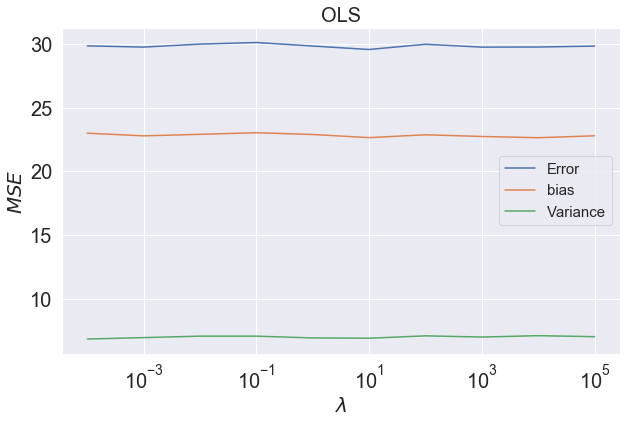

In [12]:
#Plot and save the results of OLS
fig = plt.figure(figsize=(20, 20))
plt.semilogx(lam, error_OLS_test, label='Error')
plt.semilogx(lam, bias_OLS_test, label='bias')
plt.semilogx(lam, variance_OLS_test, label='Variance')
fig.set_size_inches(10.0, 6.0)
plt.title(r'OLS',fontsize=20)
plt.xlabel('$\\lambda$',fontsize=20)
plt.ylabel(r'$MSE$',fontsize=20)
plt.legend(fontsize=15)
plt.tick_params(labelsize=20)
fig.show()

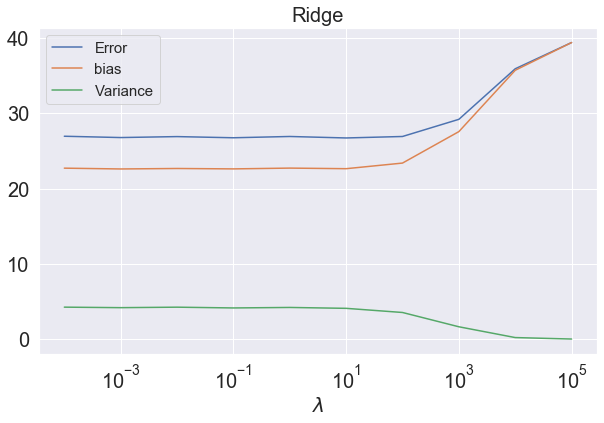

In [13]:
#Plot and save the results of Ridge regression
fig = plt.figure(figsize=(20, 20))
plt.semilogx(lam, error_ridge_test, label='Error')
plt.semilogx(lam, bias_ridge_test, label='bias')
plt.semilogx(lam, variance_ridge_test, label='Variance')
fig.set_size_inches(10.0, 6.0)
plt.title(r'Ridge',fontsize=20)
plt.xlabel('$\\lambda$',fontsize=20)
plt.legend(fontsize=15)
plt.tick_params(labelsize=20)
plt.show()
fig.savefig("BiasVariance_Ridge.png")

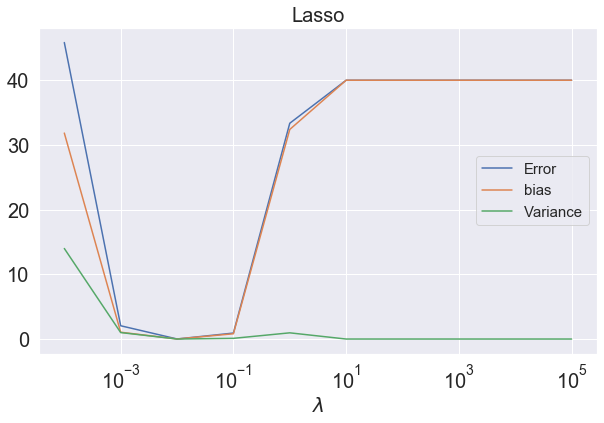

In [14]:
#Plot and save the results of Lasso regression
fig = plt.figure(figsize=(20, 20))
plt.semilogx(lam, error_lasso_test, label='Error')
plt.semilogx(lam, bias_lasso_test, label='bias')
plt.semilogx(lam, variance_lasso_test, label='Variance')
fig.set_size_inches(10.0, 6.0)
plt.title(r'Lasso',fontsize=20)
plt.xlabel('$\\lambda$',fontsize=20)
plt.legend(fontsize=15)
plt.tick_params(labelsize=20)
plt.show()
fig.savefig("BiasVariance_Lasso.png")

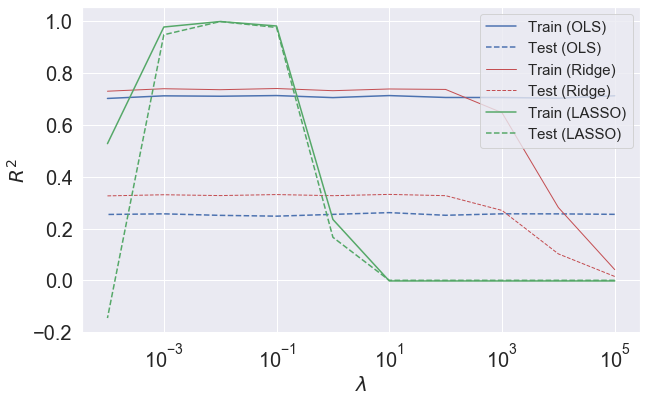

In [15]:
#Plot and save the results of R2 score
fig = plt.figure(figsize=(20, 20))
plt.semilogx(lam, R2_OLS_train, 'b',label='Train (OLS)')
plt.semilogx(lam, R2_OLS_test,'--b',label='Test (OLS)')
plt.semilogx(lam, R2_ridge_train,'r',label='Train (Ridge)',linewidth=1)
plt.semilogx(lam, R2_ridge_test,'--r',label='Test (Ridge)',linewidth=1)
plt.semilogx(lam, R2_lasso_train, 'g',label='Train (LASSO)')
plt.semilogx(lam, R2_lasso_test, '--g',label='Test (LASSO)')
fig = plt.gcf()
fig.set_size_inches(10.0, 6.0)
plt.ylabel(r'$R^2$',fontsize=20)
plt.xlabel('$\\lambda$',fontsize=20)
plt.legend(fontsize=15)
plt.tick_params(labelsize=20)
plt.show()
fig.savefig("R2_boots.png")

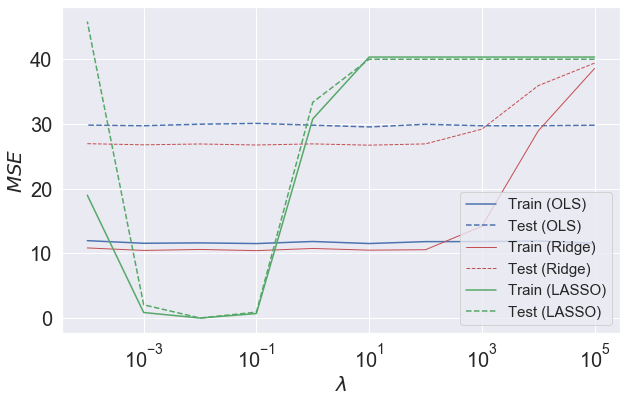

In [16]:
#Plot and save the results of MSE
fig = plt.figure(figsize=(20, 20))
plt.semilogx(lam, error_OLS_train, 'b',label='Train (OLS)')
plt.semilogx(lam, error_OLS_test,'--b',label='Test (OLS)')
plt.semilogx(lam, error_ridge_train,'r',label='Train (Ridge)',linewidth=1)
plt.semilogx(lam, error_ridge_test,'--r',label='Test (Ridge)',linewidth=1)
plt.semilogx(lam, error_lasso_train, 'g',label='Train (LASSO)')
plt.semilogx(lam, error_lasso_test, '--g',label='Test (LASSO)')
fig = plt.gcf()
fig.set_size_inches(10.0, 6.0)
plt.ylabel(r'$MSE$',fontsize=20)
plt.xlabel('$\\lambda$',fontsize=20)
plt.legend(fontsize=15)
plt.tick_params(labelsize=20)
plt.show()
fig.savefig("MSE_boots.png")

# Part c)

In [17]:
# 2D Ising model

# Ising model parameters
L=40 # linear system size
J=-1.0 # Ising interaction
T=np.linspace(0.25,4.0,16) # set of temperatures
T_c=2.26 # Onsager critical temperature in the TD limit

import pickle, os
from urllib.request import urlopen 

# url to data
url_main = 'https://physics.bu.edu/~pankajm/ML-Review-Datasets/isingMC/';

######### LOAD DATA
# The data consists of 16*10^4 samples taken in T=np.arange(0.25,4.0001,0.25):
data_file_name = "Ising2DFM_reSample_L40_T=All.pkl" 
# The labels are obtained from the following file:
label_file_name = "Ising2DFM_reSample_L40_T=All_labels.pkl"


#DATA
data = pickle.load(urlopen(url_main + data_file_name)) # pickle reads the file and returns the Python object (1D array, compressed bits)
data = np.unpackbits(data).reshape(-1, 1600) # Decompress array and reshape for convenience
data=data.astype('int')
data[np.where(data==0)]=-1 # map 0 state to -1 (Ising variable can take values +/-1)

#LABELS (convention is 1 for ordered states and 0 for disordered states)
labels = pickle.load(urlopen(url_main + label_file_name)) # pickle reads the file and returns the Python object (here just a 1D array with the binary labels)

from sklearn.model_selection import train_test_split

###### define ML parameters
num_classes=2
train_to_test_ratio=0.8 # training samples

# divide data into ordered, critical and disordered
X_ordered=data[:70000,:]
Y_ordered=labels[:70000]

X_critical=data[70000:100000,:]
Y_critical=labels[70000:100000]

X_disordered=data[100000:,:]
Y_disordered=labels[100000:]

del data,labels

In [18]:
# define training and test data sets
X=np.concatenate((X_ordered,X_disordered))
Y=np.concatenate((Y_ordered,Y_disordered))

#We split the data between train (80%) and test (20%) data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=train_to_test_ratio,test_size=1.0-train_to_test_ratio)

#Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

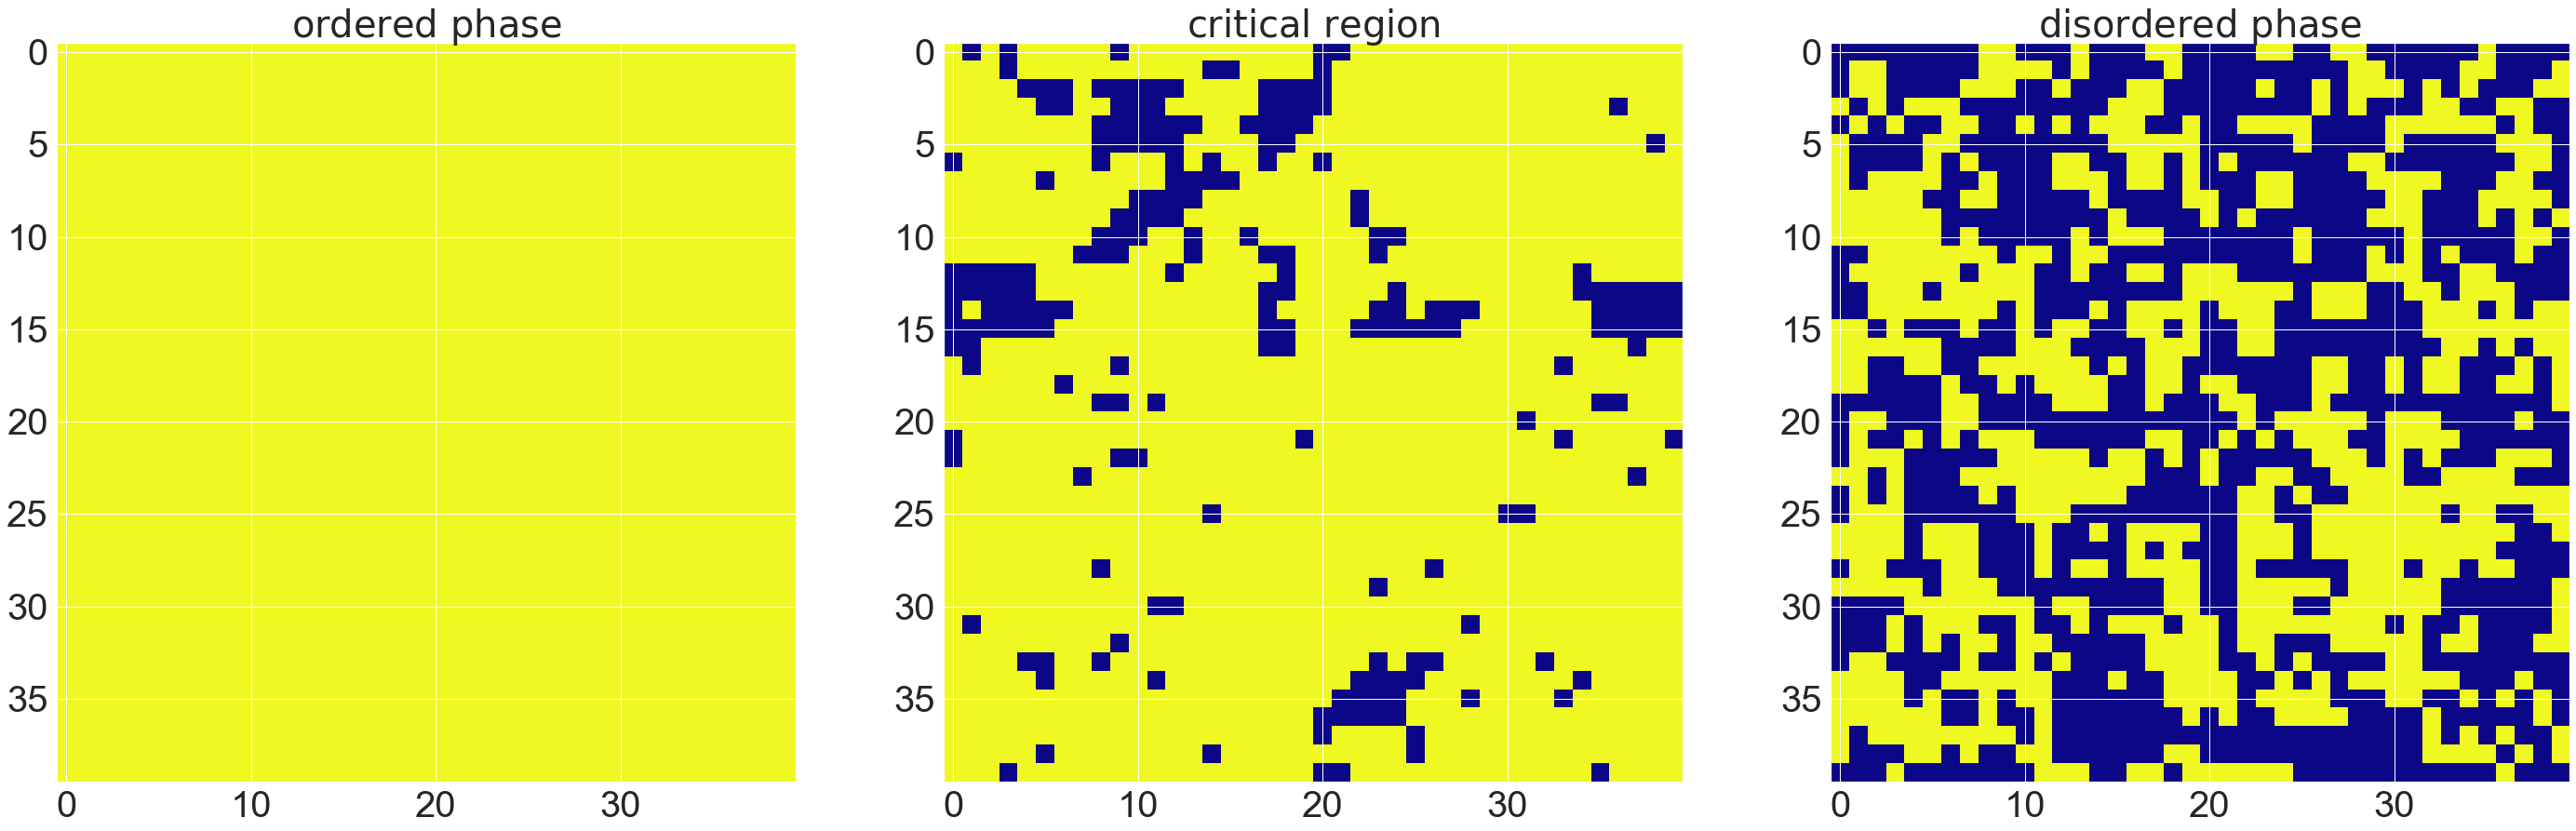

In [19]:
#### plot a few Ising states
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# set colourbar map
cmap_args=dict(cmap='plasma_r')

# plot states
fig, axarr = plt.subplots(nrows=1, ncols=3, figsize=(20,20))

axarr[0].imshow(X_ordered[20001].reshape(L,L),**cmap_args)
axarr[0].set_title('$\\mathrm{ordered\\ phase}$',fontsize=40)
axarr[0].tick_params(labelsize=40)

axarr[1].imshow(X_critical[10001].reshape(L,L),**cmap_args)
axarr[1].set_title('$\\mathrm{critical\\ region}$',fontsize=40)
axarr[1].tick_params(labelsize=40)

im=axarr[2].imshow(X_disordered[50001].reshape(L,L),**cmap_args)
axarr[2].set_title('$\\mathrm{disordered\\ phase}$',fontsize=40)
axarr[2].tick_params(labelsize=40)

fig.subplots_adjust(right=2.0)

plt.show()
fig.savefig("States.png")

In [20]:
###### apply logistic regression
from sklearn import linear_model
from sklearn.neural_network import MLPClassifier


#Define regularisation parameter
lmbdas=np.logspace(-5,5,11)

#Definition of different vectors for saving the results
train_accuracy=np.zeros(lmbdas.shape,np.float64)
test_accuracy=np.zeros(lmbdas.shape,np.float64)
critical_accuracy=np.zeros(lmbdas.shape,np.float64)

train_accuracy_SGD=np.zeros(lmbdas.shape,np.float64)
test_accuracy_SGD=np.zeros(lmbdas.shape,np.float64)
critical_accuracy_SGD=np.zeros(lmbdas.shape,np.float64)

#Loop over regularisation strength
for i,lmbda in enumerate(lmbdas):

    #Define logistic regressor
    logreg=linear_model.LogisticRegression(C=1.0/lmbda,random_state=1,verbose=0,max_iter=1E3,tol=1E-5,
                                           solver='liblinear')

    #Fit training data
    logreg.fit(X_train, Y_train)

    #Check accuracy
    train_accuracy[i]=logreg.score(X_train,Y_train)
    test_accuracy[i]=logreg.score(X_test,Y_test)
    critical_accuracy[i]=logreg.score(X_critical,Y_critical)
    
    #Define SGD-based logistic regression
    logreg_SGD = linear_model.SGDClassifier(loss='log', penalty='l2', alpha=lmbda, max_iter=1E3,tol=1E-5, 
                                           shuffle=True, random_state=1, learning_rate='optimal')

    #Fit training data
    logreg_SGD.fit(X_train,Y_train)

    #Check accuracy
    train_accuracy_SGD[i]=logreg_SGD.score(X_train,Y_train)
    test_accuracy_SGD[i]=logreg_SGD.score(X_test,Y_test)
    critical_accuracy_SGD[i]=logreg_SGD.score(X_critical,Y_critical)

    print('finished computing %i/11 iterations' %(i+1))

finished computing 1/11 iterations
finished computing 2/11 iterations
finished computing 3/11 iterations
finished computing 4/11 iterations
finished computing 5/11 iterations
finished computing 6/11 iterations
finished computing 7/11 iterations
finished computing 8/11 iterations
finished computing 9/11 iterations
finished computing 10/11 iterations
finished computing 11/11 iterations


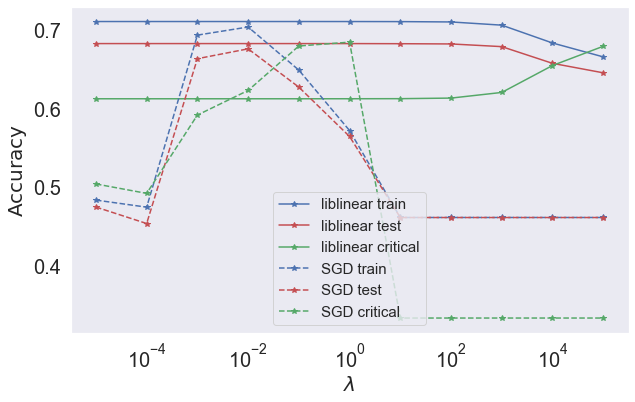

In [21]:
#Plot accuracy against regularisation strength
fig = plt.figure(figsize=(20, 20))
plt.semilogx(lmbdas,train_accuracy,'*-b',label='liblinear train')
plt.semilogx(lmbdas,test_accuracy,'*-r',label='liblinear test')
plt.semilogx(lmbdas,critical_accuracy,'*-g',label='liblinear critical')

plt.semilogx(lmbdas,train_accuracy_SGD,'*--b',label='SGD train')
plt.semilogx(lmbdas,test_accuracy_SGD,'*--r',label='SGD test')
plt.semilogx(lmbdas,critical_accuracy_SGD,'*--g',label='SGD critical')

fig = plt.gcf()
fig.set_size_inches(10.0, 6.0)
plt.xlabel('$\\lambda$',fontsize=20)
plt.ylabel('$\\mathrm{Accuracy}$',fontsize=20)

plt.legend(fontsize=15)
plt.tick_params(labelsize=20)

plt.grid()


plt.show()
fig.savefig("LogReg.png")

# Part c) (taking into account the critical states for the trainning)

In [22]:
# 2D Ising model

#Define training and test data sets
X=np.concatenate((X_ordered,X_disordered,X_critical))
Y=np.concatenate((Y_ordered,Y_disordered,Y_critical))

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=train_to_test_ratio,test_size=1.0-train_to_test_ratio)

In [23]:
###### apply logistic regression
from sklearn import linear_model
from sklearn.neural_network import MLPClassifier

X=np.concatenate((X_ordered,X_disordered))
Y=np.concatenate((Y_ordered,Y_disordered))

# define regularisation parameter
lmbdas=np.logspace(-5,5,11)

#Definition of different vectors for saving the results
train_accuracy=np.zeros(lmbdas.shape,np.float64)
test_accuracy=np.zeros(lmbdas.shape,np.float64)
critical_accuracy=np.zeros(lmbdas.shape,np.float64)
ord_accuracy=np.zeros(lmbdas.shape,np.float64)

train_accuracy_SGD=np.zeros(lmbdas.shape,np.float64)
test_accuracy_SGD=np.zeros(lmbdas.shape,np.float64)
critical_accuracy_SGD=np.zeros(lmbdas.shape,np.float64)
ord_accuracy_SGD=np.zeros(lmbdas.shape,np.float64)
# loop over regularisation strength
for i,lmbda in enumerate(lmbdas):

    # define logistic regressor
    logreg=linear_model.LogisticRegression(C=1.0/lmbda,random_state=1,verbose=0,max_iter=1E3,tol=1E-5,
                                           solver='liblinear')

    # fit training data
    logreg.fit(X_train, Y_train)

    # check accuracy
    train_accuracy[i]=logreg.score(X_train,Y_train)
    test_accuracy[i]=logreg.score(X_test,Y_test)
    critical_accuracy[i]=logreg.score(X_critical,Y_critical)
    ord_accuracy[i]=logreg.score(X,Y)

    # define SGD-based logistic regression
    logreg_SGD = linear_model.SGDClassifier(loss='log', penalty='l2', alpha=lmbda, max_iter=1E3,tol=1E-5, 
                                           shuffle=True, random_state=1, learning_rate='optimal')

    # fit training data
    logreg_SGD.fit(X_train,Y_train)

    # check accuracy
    train_accuracy_SGD[i]=logreg_SGD.score(X_train,Y_train)
    test_accuracy_SGD[i]=logreg_SGD.score(X_test,Y_test)
    critical_accuracy_SGD[i]=logreg_SGD.score(X_critical,Y_critical)
    ord_accuracy_SGD[i]=logreg_SGD.score(X,Y)

    print('Finished computing %i/11 iterations' %(i+1))



Finished computing 1/11 iterations
Finished computing 2/11 iterations
Finished computing 3/11 iterations
Finished computing 4/11 iterations
Finished computing 5/11 iterations
Finished computing 6/11 iterations
Finished computing 7/11 iterations
Finished computing 8/11 iterations
Finished computing 9/11 iterations
Finished computing 10/11 iterations
Finished computing 11/11 iterations


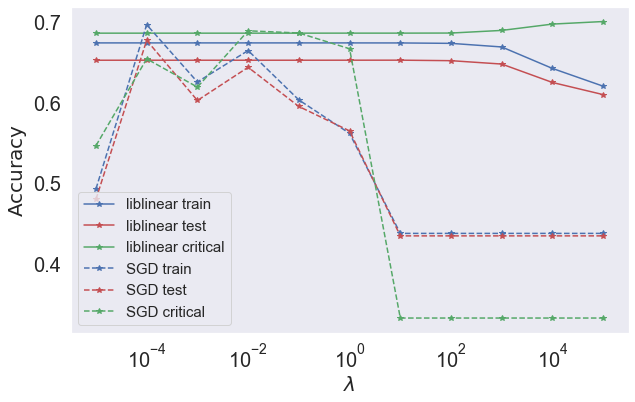

In [26]:
#Plot accuracy against regularisation strength
fig = plt.figure(figsize=(20, 20))
plt.semilogx(lmbdas,train_accuracy,'*-b',label='liblinear train')
plt.semilogx(lmbdas,test_accuracy,'*-r',label='liblinear test')
plt.semilogx(lmbdas,critical_accuracy,'*-g',label='liblinear critical')

plt.semilogx(lmbdas,train_accuracy_SGD,'*--b',label='SGD train')
plt.semilogx(lmbdas,test_accuracy_SGD,'*--r',label='SGD test')
plt.semilogx(lmbdas,critical_accuracy_SGD,'*--g',label='SGD critical')

fig = plt.gcf()
fig.set_size_inches(10.0, 6.0)
plt.xlabel('$\\lambda$',fontsize=20)
plt.ylabel('$\\mathrm{Accuracy}$',fontsize=20)

plt.legend(fontsize=15)
plt.tick_params(labelsize=20)

plt.grid()


plt.show()
fig.savefig("LogReg2.png")

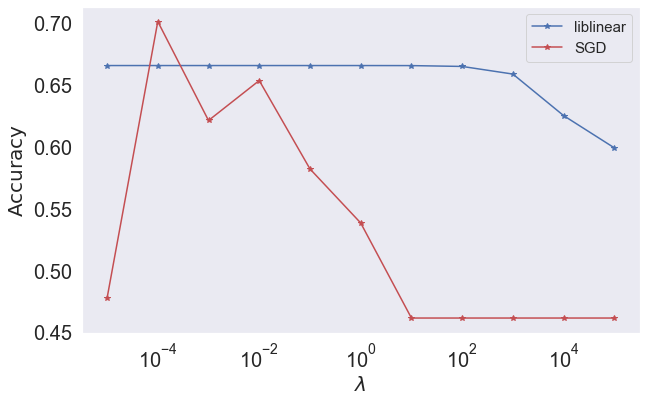

In [27]:
fig = plt.figure(figsize=(20, 20))
plt.semilogx(lmbdas,ord_accuracy,'*-b',label='liblinear')
plt.semilogx(lmbdas,ord_accuracy_SGD,'*-r',label='SGD')

fig = plt.gcf()
fig.set_size_inches(10.0, 6.0)
plt.xlabel('$\\lambda$',fontsize=20)
plt.ylabel('$\\mathrm{Accuracy}$',fontsize=20)

plt.legend(fontsize=15)
plt.tick_params(labelsize=20)

plt.grid()

plt.show()
fig.savefig("LogReg2_ord.png")

# Part d)

In [29]:
import tensorflow as tf
from tensorflow import keras

#We split the design matrix and the energy vector between train (80%) and test (20%) data
spins_train, spins_test, y_train, y_test = train_test_split(spins, y, test_size=0.2)

In [30]:
#Dependence on number of nodes

#Definition of parameters
N=np.linspace(10,100,num=10)
MSE=np.zeros(len(N))
MSE_train=np.zeros(len(N))

#Loop over the number of nodes
for i in range(len(N)):
    #Defining the model
    model = keras.Sequential([
            keras.layers.Flatten(input_shape=[L]),
            keras.layers.Dense(N[i], activation='relu'),
            keras.layers.Dense(1, activation='linear')
            ])
    #Compiling the model
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mse'])
    
    # Training the model
    model.fit(spins_train, y_train, epochs=50, verbose=0)
    
    #Evaluating the model in test and training data
    test_loss, test_acc = model.evaluate(spins_test, y_test, verbose=0)
    MSE[i]=test_loss
    
    test_loss, test_acc = model.evaluate(spins_train, y_train, verbose=0)
    MSE_train[i]=test_loss
    
    print('finished computing %i/10 iterations' %(i+1))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
finished computing 1/10 iterations
finished computing 2/10 iterations
finished computing 3/10 iterations
finished computing 4/10 iterations
finished computing 5/10 iterations
finished computing 6/10 iterations
finished computing 7/10 iterations
finished computing 8/10 iterations
finished computing 9/10 iterations
finished computing 10/10 iterations


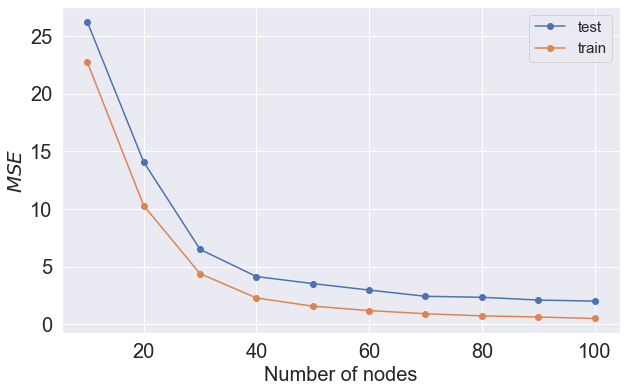

In [31]:
#Plot and save the results
fig, axarr = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
plt.plot(N,MSE,'-o',label='test')
plt.plot(N,MSE_train,'-o',label='train')

fig = plt.gcf()
fig.set_size_inches(10.0, 6.0)
plt.xlabel('Number of nodes',fontsize=20)
plt.ylabel('$MSE$',fontsize=20)
plt.legend(fontsize=15)
plt.tick_params(labelsize=20)

plt.show()
fig.savefig("nodes_1D.png")
#fig.savefig("nodes_1D.png", format='png')

In [32]:
#Dependence on number of hidden layers
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation

#Definition of parameters
N=np.linspace(0,10,num=11)
MSE=np.zeros(len(N))
MSE_train=np.zeros(len(N))

#NUmber of nodes (x10)
i=3
#Number of epochs
n_epochs=50

#NO HIDDEN LAYER
#Defining the model
model = keras.Sequential([keras.layers.Flatten(input_shape=[L]),
            keras.layers.Dense(1, activation='linear')
            ])

#Compiling the model
model.compile(optimizer='rmsprop', loss='mse', metrics=['mse'])

#Training the model
model.fit(spins_train, y_train, epochs=n_epochs, verbose=0)

#Evaluating the model in test and training data
test_loss, test_acc = model.evaluate(spins_test, y_test, verbose=0)
MSE[0]=test_loss

test_loss, test_acc = model.evaluate(spins_train, y_train, verbose=0)
MSE_train[0]=test_loss
j=0
print('finished computing %i/11 iterations' %(j+1))


#1 HIDDEN LAYER
#Defining the model
model = keras.Sequential([keras.layers.Flatten(input_shape=[L]),
        keras.layers.Dense(10*i, activation='relu'),
        keras.layers.Dense(1, activation='linear')
            ])

#Compiling the model
model.compile(optimizer='rmsprop', loss='mse', metrics=['mse'])

#Training the model
model.fit(spins_train, y_train, epochs=n_epochs, verbose=0)

#Evaluating the model in test and training data
test_loss, test_acc = model.evaluate(spins_test, y_test, verbose=0)
MSE[1]=test_loss

test_loss, test_acc = model.evaluate(spins_train, y_train, verbose=0)
MSE_train[1]=test_loss
j+=1
print('finished computing %i/11 iterations' %(j+1))


#2 HIDDEN LAYER
#Defining the model
model = keras.Sequential([keras.layers.Flatten(input_shape=[L]),
        keras.layers.Dense(10*i, activation='relu'),
        keras.layers.Dense(10*i, activation='relu'),
        keras.layers.Dense(1, activation='linear')
            ])

#Compiling the model
model.compile(optimizer='rmsprop', loss='mse', metrics=['mse'])

#Training the model
model.fit(spins_train, y_train, epochs=n_epochs, verbose=0)

#Evaluating the model in test and training data
test_loss, test_acc = model.evaluate(spins_test, y_test, verbose=0)
MSE[2]=test_loss

test_loss, test_acc = model.evaluate(spins_train, y_train, verbose=0)
MSE_train[2]=test_loss
j+=1
print('finished computing %i/11 iterations' %(j+1))


#3 HIDDEN LAYER
#Defining the model
model = keras.Sequential([keras.layers.Flatten(input_shape=[L]),
        keras.layers.Dense(10*i, activation='relu'),
        keras.layers.Dense(10*i, activation='relu'),                  
        keras.layers.Dense(10*i, activation='relu'),
        keras.layers.Dense(1, activation='linear')
            ])

#Compiling the model
model.compile(optimizer='rmsprop', loss='mse', metrics=['mse'])
#Training the model
model.fit(spins_train, y_train, epochs=n_epochs, verbose=0)

#Evaluating the model in test and training data
test_loss, test_acc = model.evaluate(spins_test, y_test, verbose=0)
MSE[3]=test_loss

test_loss, test_acc = model.evaluate(spins_train, y_train, verbose=0)
MSE_train[3]=test_loss
j+=1
print('finished computing %i/11 iterations' %(j+1))


#4 HIDDEN LAYER
#Defining the model
model = keras.Sequential([keras.layers.Flatten(input_shape=[L]),                                  
        keras.layers.Dense(10*i, activation='relu'),                  
        keras.layers.Dense(10*i, activation='relu'),                  
        keras.layers.Dense(10*i, activation='relu'),                  
        keras.layers.Dense(10*i, activation='relu'),
        keras.layers.Dense(1, activation='linear')
            ])

#Compiling the model
model.compile(optimizer='rmsprop', loss='mse', metrics=['mse'])
#Training the model
model.fit(spins_train, y_train, epochs=n_epochs, verbose=0)

#Evaluating the model in test and training data
test_loss, test_acc = model.evaluate(spins_test, y_test, verbose=0)
MSE[4]=test_loss

test_loss, test_acc = model.evaluate(spins_train, y_train, verbose=0)
MSE_train[4]=test_loss
j+=1
print('finished computing %i/11 iterations' %(j+1))


#5 HIDDEN LAYER
#Defining the model
model = keras.Sequential([keras.layers.Flatten(input_shape=[L]), 
        keras.layers.Dense(10*i, activation='relu'),                
        keras.layers.Dense(10*i, activation='relu'),                  
        keras.layers.Dense(10*i, activation='relu'),                  
        keras.layers.Dense(10*i, activation='relu'),                  
        keras.layers.Dense(10*i, activation='relu'),
        keras.layers.Dense(1, activation='linear')
            ])

#Compiling the model
model.compile(optimizer='rmsprop', loss='mse', metrics=['mse'])
#Training the model
model.fit(spins_train, y_train, epochs=n_epochs, verbose=0)

#Evaluating the model in test and training data
test_loss, test_acc = model.evaluate(spins_test, y_test, verbose=0)
MSE[5]=test_loss

test_loss, test_acc = model.evaluate(spins_train, y_train, verbose=0)
MSE_train[5]=test_loss
j+=1
print('finished computing %i/11 iterations' %(j+1))


#6 HIDDEN LAYER
#Defining the model
model = keras.Sequential([keras.layers.Flatten(input_shape=[L]),                  
        keras.layers.Dense(10*i, activation='relu'),
        keras.layers.Dense(10*i, activation='relu'),                
        keras.layers.Dense(10*i, activation='relu'),                  
        keras.layers.Dense(10*i, activation='relu'),                  
        keras.layers.Dense(10*i, activation='relu'),                  
        keras.layers.Dense(10*i, activation='relu'),
        keras.layers.Dense(1, activation='linear')
            ])

#Compiling the model
model.compile(optimizer='rmsprop', loss='mse', metrics=['mse'])

#Training the model
model.fit(spins_train, y_train, epochs=n_epochs, verbose=0)

#Evaluating the model in test and training data
test_loss, test_acc = model.evaluate(spins_test, y_test, verbose=0)
MSE[6]=test_loss

test_loss, test_acc = model.evaluate(spins_train, y_train, verbose=0)
MSE_train[6]=test_loss
j+=1
print('finished computing %i/11 iterations' %(j+1))


#7 HIDDEN LAYER
#Defining the model
model = keras.Sequential([keras.layers.Flatten(input_shape=[L]),                  
        keras.layers.Dense(10*i, activation='relu'),                  
        keras.layers.Dense(10*i, activation='relu'),
        keras.layers.Dense(10*i, activation='relu'),                
        keras.layers.Dense(10*i, activation='relu'),                  
        keras.layers.Dense(10*i, activation='relu'),                  
        keras.layers.Dense(10*i, activation='relu'),                  
        keras.layers.Dense(10*i, activation='relu'),
        keras.layers.Dense(1, activation='linear')
            ])

#Compiling the model
model.compile(optimizer='rmsprop', loss='mse', metrics=['mse'])

#Training the model
model.fit(spins_train, y_train, epochs=n_epochs, verbose=0)

#Evaluating the model in test and training data
test_loss, test_acc = model.evaluate(spins_test, y_test, verbose=0)
MSE[7]=test_loss

test_loss, test_acc = model.evaluate(spins_train, y_train, verbose=0)
MSE_train[7]=test_loss
j+=1
print('finished computing %i/11 iterations' %(j+1))


#8 HIDDEN LAYER
#Defining the model
model = keras.Sequential([keras.layers.Flatten(input_shape=[L]),                 
        keras.layers.Dense(10*i, activation='relu'),                  
        keras.layers.Dense(10*i, activation='relu'),                  
        keras.layers.Dense(10*i, activation='relu'),
        keras.layers.Dense(10*i, activation='relu'),                
        keras.layers.Dense(10*i, activation='relu'),                  
        keras.layers.Dense(10*i, activation='relu'),                  
        keras.layers.Dense(10*i, activation='relu'),                  
        keras.layers.Dense(10*i, activation='relu'),
        keras.layers.Dense(1, activation='linear')
            ])
#Compiling the model
model.compile(optimizer='rmsprop', loss='mse', metrics=['mse'])

#Training the model
model.fit(spins_train, y_train, epochs=n_epochs, verbose=0)

#Evaluating the model in test and training data
test_loss, test_acc = model.evaluate(spins_test, y_test, verbose=0)
MSE[8]=test_loss

test_loss, test_acc = model.evaluate(spins_train, y_train, verbose=0)
MSE_train[8]=test_loss
j+=1
print('finished computing %i/11 iterations' %(j+1))



#9 HIDDEN LAYER
#Defining the model
model = keras.Sequential([keras.layers.Flatten(input_shape=[L]),               
        keras.layers.Dense(10*i, activation='relu'),                  
        keras.layers.Dense(10*i, activation='relu'),                  
        keras.layers.Dense(10*i, activation='relu'),                  
        keras.layers.Dense(10*i, activation='relu'),
        keras.layers.Dense(10*i, activation='relu'),                
        keras.layers.Dense(10*i, activation='relu'),                  
        keras.layers.Dense(10*i, activation='relu'),                  
        keras.layers.Dense(10*i, activation='relu'),                  
        keras.layers.Dense(10*i, activation='relu'),
        keras.layers.Dense(1, activation='linear')
            ])

#Compiling the model
model.compile(optimizer='rmsprop', loss='mse', metrics=['mse'])

#Training the model
model.fit(spins_train, y_train, epochs=n_epochs, verbose=0)

#Evaluating the model in test and training data
test_loss, test_acc = model.evaluate(spins_test, y_test, verbose=0)
MSE[9]=test_loss

test_loss, test_acc = model.evaluate(spins_train, y_train, verbose=0)
MSE_train[9]=test_loss
j+=1
print('finished computing %i/11 iterations' %(j+1))


#10 HIDDEN LAYER
#Defining the model
model = keras.Sequential([keras.layers.Flatten(input_shape=[L]),
        keras.layers.Dense(10*i, activation='relu'),                
        keras.layers.Dense(10*i, activation='relu'),                  
        keras.layers.Dense(10*i, activation='relu'),                  
        keras.layers.Dense(10*i, activation='relu'),                  
        keras.layers.Dense(10*i, activation='relu'),
        keras.layers.Dense(10*i, activation='relu'),                
        keras.layers.Dense(10*i, activation='relu'),                  
        keras.layers.Dense(10*i, activation='relu'),                  
        keras.layers.Dense(10*i, activation='relu'),                  
        keras.layers.Dense(10*i, activation='relu'),
        keras.layers.Dense(1, activation='linear')
            ])

#Compiling the model
model.compile(optimizer='rmsprop', loss='mse', metrics=['mse'])
#Training the model
model.fit(spins_train, y_train, epochs=n_epochs, verbose=0)

#Evaluating the model in test and training data
test_loss, test_acc = model.evaluate(spins_test, y_test, verbose=0)
MSE[10]=test_loss

test_loss, test_acc = model.evaluate(spins_train, y_train, verbose=0)
MSE_train[10]=test_loss
j+=1
print('finished computing %i/11 iterations' %(j+1))

Using TensorFlow backend.


finished computing 1/11 iterations
finished computing 2/11 iterations
finished computing 3/11 iterations
finished computing 4/11 iterations
finished computing 5/11 iterations
finished computing 6/11 iterations
finished computing 7/11 iterations
finished computing 8/11 iterations
finished computing 9/11 iterations
finished computing 10/11 iterations
finished computing 11/11 iterations


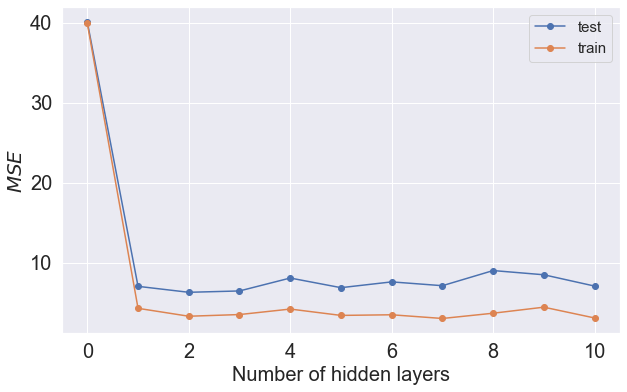

In [33]:
#Plot and save the results
fig, axarr = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
plt.plot(N,MSE,'-o',label='test')
plt.plot(N,MSE_train,'-o',label='train')

fig = plt.gcf()
fig.set_size_inches(10.0, 6.0)
plt.xlabel('Number of hidden layers',fontsize=20)
plt.ylabel('$MSE$',fontsize=20)
plt.legend(fontsize=15)
plt.tick_params(labelsize=20)
plt.show()
fig.savefig("layers_1D.png")

In [34]:
#Dependence on number of epochs
import tensorflow as tf
from tensorflow import keras

#Defining the parameters
N=np.linspace(0,100,num=11)
N[0]=1
MSE=np.zeros(len(N))
MSE_train=np.zeros(len(N))

#Loop over the number of epochs
for i in range(len(N)):
    #Defining the model
    model = keras.Sequential([
            keras.layers.Flatten(input_shape=[L]),
            keras.layers.Dense(30, activation='relu'),
            keras.layers.Dense(30, activation='relu'),
            keras.layers.Dense(30, activation='relu'),
            keras.layers.Dense(1, activation='linear')
            ])
    
    #Compiling the model
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mse'])
    
    # Training the model
    model.fit(spins_train, y_train, epochs=int(N[i]), verbose=0)
    
    #Evaluating the model in test and training data
    test_loss, test_acc = model.evaluate(spins_test, y_test, verbose=0)
    MSE[i]=test_loss
    
    test_loss, test_acc = model.evaluate(spins_train, y_train, verbose=0)
    MSE_train[i]=test_loss
    
    print('finished computing %i/11 iterations' %(i+1))

finished computing 1/11 iterations
finished computing 2/11 iterations
finished computing 3/11 iterations
finished computing 4/11 iterations
finished computing 5/11 iterations
finished computing 6/11 iterations
finished computing 7/11 iterations
finished computing 8/11 iterations
finished computing 9/11 iterations
finished computing 10/11 iterations
finished computing 11/11 iterations


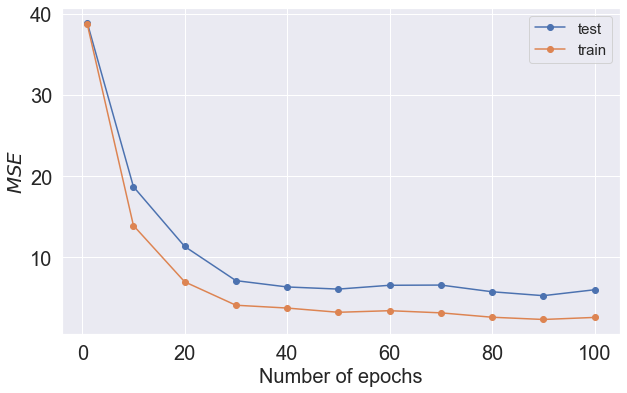

In [35]:
#Plot and save the results
fig, axarr = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
plt.plot(N,MSE,'-o',label='test')
plt.plot(N,MSE_train,'-o',label='train')

fig = plt.gcf()
fig.set_size_inches(10.0, 6.0)
plt.xlabel('Number of epochs',fontsize=20)
plt.ylabel('$MSE$',fontsize=20)
plt.legend(fontsize=15)
plt.tick_params(labelsize=20)
plt.show()
fig.savefig("epochs_1D.png")

In [89]:
#Dependence on activation function

#Definition of the different activation functions
act_func = ['elu', 'selu', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'exponential', 'linear']
MSE=np.zeros(len(act_func))
MSE_train=np.zeros(len(act_func))

#Loop over the activation functions
for i in range(len(act_func)):
    #Defining the model
    model = keras.Sequential([
            keras.layers.Flatten(input_shape=[L]),
            keras.layers.Dense(30, activation=act_func[i]),
            keras.layers.Dense(30, activation=act_func[i]),
            keras.layers.Dense(30, activation=act_func[i]),
            keras.layers.Dense(1, activation='linear')
            ])
    #Compiling the model
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mse'])
    
    # Training the model
    model.fit(spins_train, y_train, epochs=50, verbose=0)
    
    #Evaluating the model in test and training data
    test_loss, test_acc = model.evaluate(spins_test, y_test, verbose=0)
    MSE[i]=test_loss
    
    test_loss, test_acc = model.evaluate(spins_train, y_train, verbose=0)
    MSE_train[i]=test_loss
    print('finished computing %i/8 iterations' %(i+1))

finished computing 1/8 iterations
finished computing 2/8 iterations
finished computing 3/8 iterations
finished computing 4/8 iterations
finished computing 5/8 iterations
finished computing 6/8 iterations
finished computing 7/8 iterations
finished computing 8/8 iterations


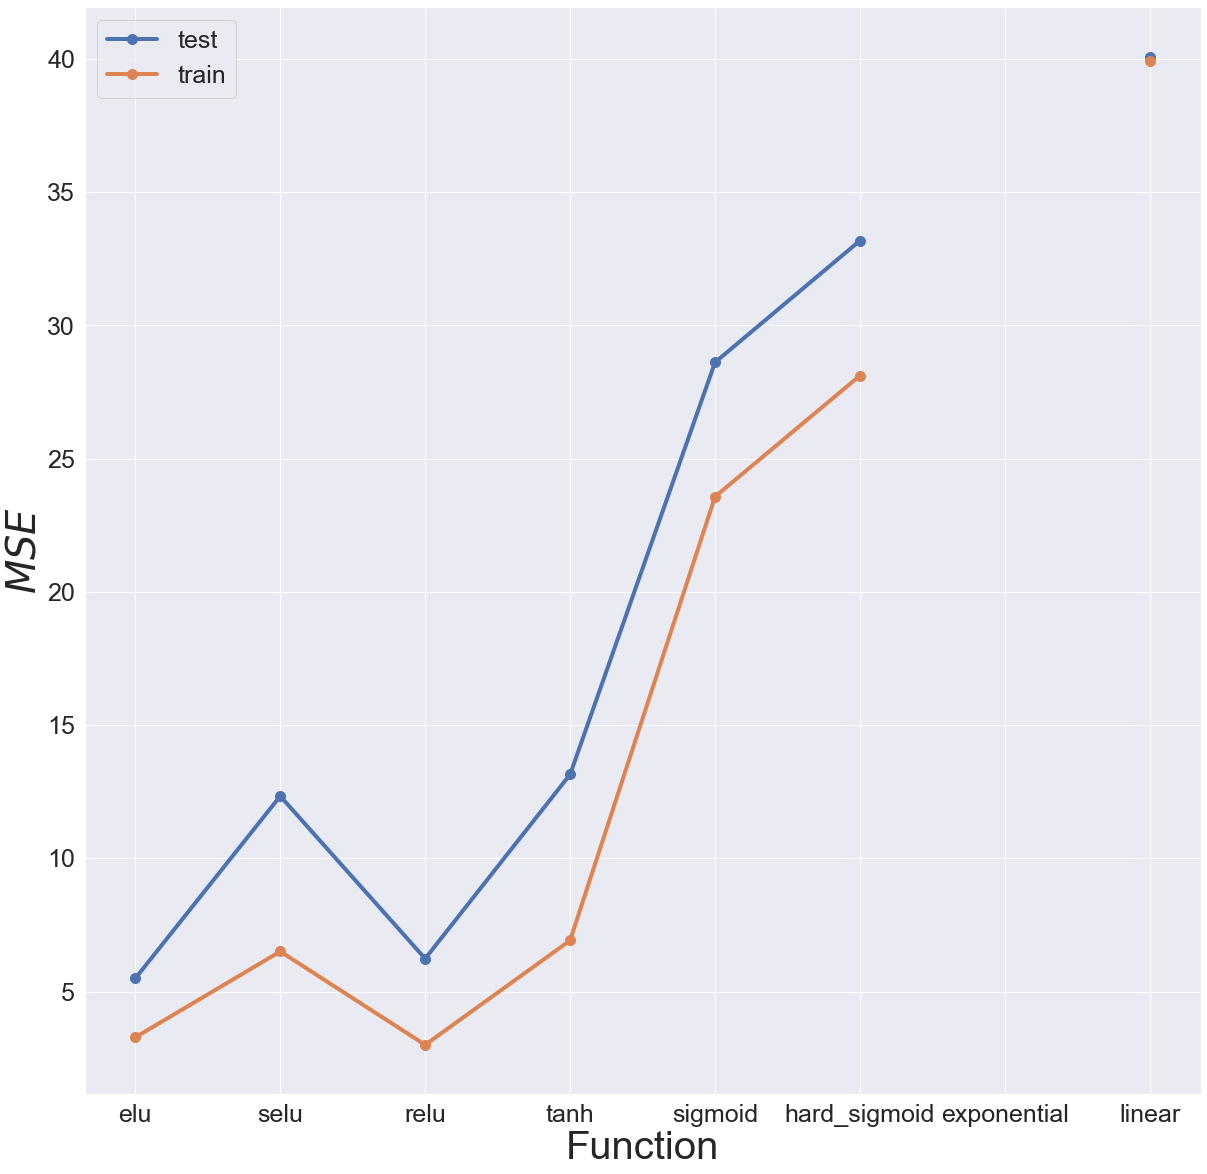

In [95]:
#Plot and save the results
fig, axarr = plt.subplots(nrows=1, ncols=1, figsize=(20,20))
plt.plot(act_func,MSE,'-o',label='test', linewidth=4, markersize=10)
plt.plot(act_func,MSE_train,'-o',label='train', linewidth=4, markersize=10)

fig = plt.gcf()
plt.xlabel('Function',fontsize=40)
plt.ylabel('$MSE$',fontsize=40)
plt.legend(fontsize=25)
plt.tick_params(labelsize=25)

plt.show()
fig.savefig("function_1D.png")

In [39]:
#Dependence on the values of the hyperparameters
import tensorflow as tf
from tensorflow import keras
from keras import regularizers

#Definition of the parameters
eta_vals = np.logspace(-5, 1, 7)
lmbd_vals = np.logspace(-5, 1, 7)
MSE=np.zeros((len(eta_vals),len(lmbd_vals)))
MSE_train=np.zeros((len(eta_vals),len(lmbd_vals)))

#Loop over the learning rate values
for i, eta in enumerate(eta_vals):
    
    #Loop over the regularization hyperparameter
    for j, lmbd in enumerate(lmbd_vals):
        
        #Defining the model
        model = keras.Sequential([
                keras.layers.Flatten(input_shape=[L]),
                keras.layers.Dense(30, activation='relu', kernel_regularizer=regularizers.l2(lmbd)),
                keras.layers.Dense(30, activation='relu', kernel_regularizer=regularizers.l2(lmbd)),
                keras.layers.Dense(30, activation='relu', kernel_regularizer=regularizers.l2(lmbd)),
                keras.layers.Dense(1, activation='linear')
                ])
        
        #Compiling the model
        opt = keras.optimizers.RMSprop(learning_rate=eta)
        model.compile(optimizer=opt, loss='mse', metrics=['mse'])

        # Training the model
        model.fit(spins_train, y_train, epochs=50, verbose=0)

        #Evaluating the model in test and training data
        test_loss, test_acc = model.evaluate(spins_test, y_test, verbose=0)
        MSE[i,j]=test_loss
        
        test_loss, test_acc = model.evaluate(spins_train, y_train, verbose=0)
        MSE_train[i,j]=test_loss
    
    print('finished computing %i/7 iterations' %(i+1))

finished computing 1/7 iterations
finished computing 2/7 iterations
finished computing 3/7 iterations
finished computing 4/7 iterations
finished computing 5/7 iterations
finished computing 6/7 iterations
finished computing 7/7 iterations


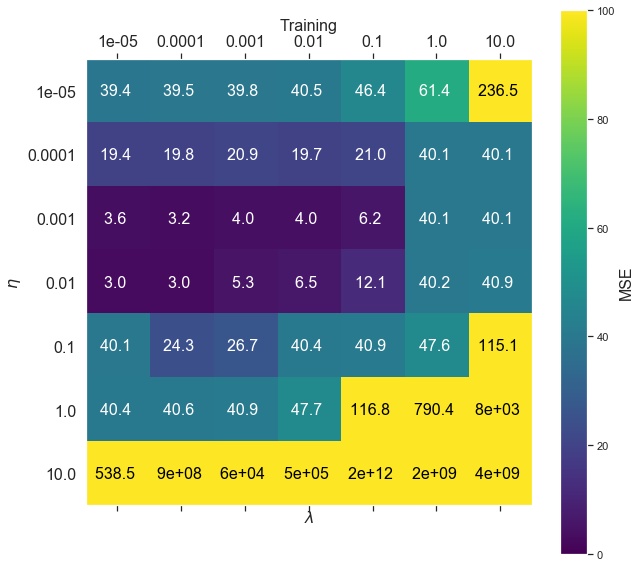

In [88]:
#Plot and save the results of the training data
fontsize=16
data=MSE_train
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(data, interpolation='nearest', vmin=0, vmax=100, cmap="viridis")
    
cbar=fig.colorbar(cax)
cbar.ax.set_ylabel('MSE',rotation=90,fontsize=fontsize)

# put text on matrix elements
for i, x_val in enumerate(np.arange(len(eta_vals))):
    for j, y_val in enumerate(np.arange(len(lmbd_vals))):
        if data[j,i]>1000:
            c = "{:.0e} ".format( data[j,i])
        else:
            c = "{:.1f} ".format( data[j,i])
        
        if data[j,i]>100:
            ax.text(x_val, y_val, c, va='center', ha='center',fontsize=fontsize,color='black')
        else:
            ax.text(x_val, y_val, c, va='center', ha='center',fontsize=fontsize,color='white')
# convert axis vaues to to string labels
x=[str(i) for i in eta_vals]
y=[str(i) for i in lmbd_vals]



ax.set_xticklabels(['']+x,fontsize=fontsize)
ax.set_yticklabels(['']+y,fontsize=fontsize)

ax.set_xlabel('$\\mathrm{learning\\ rate}$',fontsize=fontsize)
ax.set_ylabel('$\\mathrm{hidden\\ neurons}$',fontsize=fontsize)

ax.set_title("Training",fontsize=fontsize)
ax.set_ylabel("$\eta$",fontsize=fontsize)
ax.set_xlabel("$\lambda$",fontsize=fontsize)

plt.grid()
plt.show()
fig.savefig("hyp_1D_train.png")

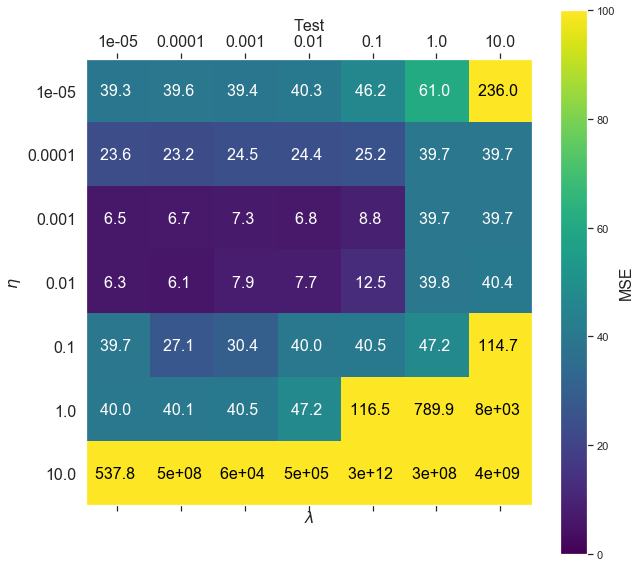

In [87]:
fontsize=16
data=MSE
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(data, interpolation='nearest', vmin=0, vmax=100, cmap="viridis")
    
cbar=fig.colorbar(cax)
cbar.ax.set_ylabel('MSE',rotation=90,fontsize=fontsize)

# put text on matrix elements
for i, x_val in enumerate(np.arange(len(eta_vals))):
    for j, y_val in enumerate(np.arange(len(lmbd_vals))):
        if data[j,i]>1000:
            c = "{:.0e} ".format( data[j,i])
        else:
            c = "{:.1f} ".format( data[j,i])
        
        if data[j,i]>100:
            ax.text(x_val, y_val, c, va='center', ha='center',fontsize=fontsize,color='black')
        else:
            ax.text(x_val, y_val, c, va='center', ha='center',fontsize=fontsize,color='white')

# convert axis vaues to to string labels
x=[str(i) for i in eta_vals]
y=[str(i) for i in lmbd_vals]



ax.set_xticklabels(['']+x,fontsize=fontsize)
ax.set_yticklabels(['']+y,fontsize=fontsize)

ax.set_xlabel('$\\mathrm{learning\\ rate}$',fontsize=fontsize)
ax.set_ylabel('$\\mathrm{hidden\\ neurons}$',fontsize=fontsize)

ax.set_title("Test",fontsize=fontsize)
ax.set_ylabel("$\eta$",fontsize=fontsize)
ax.set_xlabel("$\lambda$",fontsize=fontsize)

plt.grid()
plt.show()
fig.savefig("hyp_1D.png")

# Part e) (without training with critical states)

In [104]:
# define training and test data sets
X=np.concatenate((X_ordered,X_disordered))
Y=np.concatenate((Y_ordered,Y_disordered))

# pick random data points from ordered and disordered states 
# to create the training and test sets
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_critical = scaler.transform(X_critical)

In [59]:
#Dependence on number of nodes
import tensorflow as tf
from tensorflow import keras

N=np.linspace(0,100,num=11)
N[0]=1
accuracy=np.zeros(len(N))
accuracy_train=np.zeros(len(N))
accuracy_crit=np.zeros(len(N))

for i in range(len(N)):
    #Defining the model
    model = keras.Sequential([
            keras.layers.Flatten(input_shape=[L**2]),
            keras.layers.Dense(N[i], activation='relu'),
            keras.layers.Dense(1, activation='softmax')
            ])
    
    #Compiling the model
    model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
    
    # Training the model
    model.fit(X_train, Y_train[:,np.newaxis], epochs=5, verbose=0)
    
    #Evaluating the model in test, critical and training data
    test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=0)
    accuracy[i]=test_acc
    
    test_loss, test_acc = model.evaluate(X_critical, Y_critical, verbose=0)
    accuracy_crit[i]=test_acc
    
    test_loss, test_acc = model.evaluate(X_train, Y_train, verbose=0)
    accuracy_train[i]=test_acc
    print('finished computing %i/11 iterations' %(i+1))

finished computing 2/11 iterations
finished computing 3/11 iterations
finished computing 4/11 iterations
finished computing 5/11 iterations
finished computing 6/11 iterations
finished computing 7/11 iterations
finished computing 8/11 iterations
finished computing 9/11 iterations
finished computing 10/11 iterations
finished computing 11/11 iterations


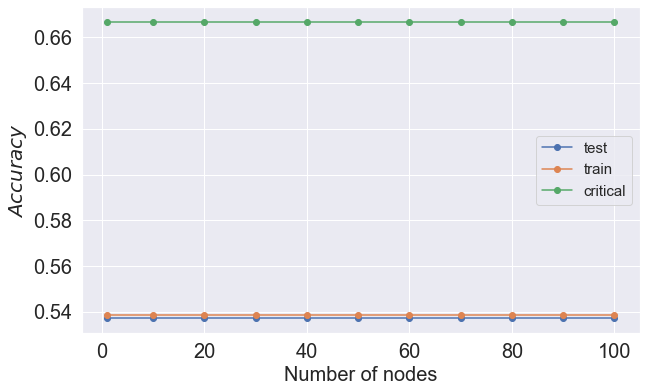

In [60]:
#Plot and save the results
fig, axarr = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
plt.plot(N,accuracy,'-o', label='test')
plt.plot(N,accuracy_train,'-o', label='train')
plt.plot(N,accuracy_crit,'-o', label='critical')

fig = plt.gcf()
fig.set_size_inches(10.0, 6.0)
plt.xlabel('Number of nodes',fontsize=20)
plt.ylabel('$Accuracy$',fontsize=20)
plt.legend(fontsize=15)
plt.tick_params(labelsize=20)
plt.show()
fig.savefig("nodes_2D.png")

In [61]:
#Dependence on number of hidden layers
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation

#Definition of the parameters
N=np.linspace(0,10,num=11)
accuracy=np.zeros(len(N))
accuracy_train=np.zeros(len(N))
accuracy_crit=np.zeros(len(N))

#Number of nodes (x10)
i=3
#Number of epochs
n_epochs=5

#NO HIDDEN LAYER
#Defining the model
model = keras.Sequential([keras.layers.Flatten(input_shape=[L**2]),
            keras.layers.Dense(1, activation='linear')
            ])

#Compiling the model
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])  

# Training the model
model.fit(X_train, Y_train, epochs=n_epochs, verbose=0)

#Evaluating the model in test, critical and training data
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=0)
accuracy[0]=test_acc

test_loss, test_acc = model.evaluate(X_critical, Y_critical, verbose=0)
accuracy_crit[0]=test_acc

test_loss, test_acc = model.evaluate(X_train, Y_train, verbose=0)
accuracy_train[0]=test_acc
j=0
print('finished computing %i/11 iterations' %(j+1))



#1 HIDDEN LAYER
#Defining the model
model = keras.Sequential([keras.layers.Flatten(input_shape=[L**2]),
        keras.layers.Dense(10*i, activation='relu'),
        keras.layers.Dense(1, activation='softmax')
            ])

#Compiling the model
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])  

# Training the model
model.fit(X_train, Y_train, epochs=n_epochs, verbose=0)

#Evaluating the model in test, critical and training data
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=0)
accuracy[1]=test_acc

test_loss, test_acc = model.evaluate(X_critical, Y_critical, verbose=0)
accuracy_crit[1]=test_acc

test_loss, test_acc = model.evaluate(X_train, Y_train, verbose=0)
accuracy_train[1]=test_acc
j+=1
print('finished computing %i/11 iterations' %(j+1))



#2 HIDDEN LAYER
#Defining the model
model = keras.Sequential([keras.layers.Flatten(input_shape=[L**2]),
        keras.layers.Dense(10*i, activation='relu'),
        keras.layers.Dense(10*i, activation='relu'),
        keras.layers.Dense(1, activation='softmax')
            ])

#Compiling the model
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

# Training the model
model.fit(X_train, Y_train, epochs=n_epochs, verbose=0)

#Evaluating the model in test, critical and training data
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=0)
accuracy[2]=test_acc

test_loss, test_acc = model.evaluate(X_critical, Y_critical, verbose=0)
accuracy_crit[2]=test_acc

test_loss, test_acc = model.evaluate(X_train, Y_train, verbose=0)
accuracy_train[2]=test_acc
j+=1
print('finished computing %i/11 iterations' %(j+1))



#3 HIDDEN LAYER
#Defining the model
model = keras.Sequential([keras.layers.Flatten(input_shape=[L**2]),
        keras.layers.Dense(10*i, activation='relu'),
        keras.layers.Dense(10*i, activation='relu'),                  
        keras.layers.Dense(10*i, activation='relu'),
        keras.layers.Dense(1, activation='softmax')
            ])

#Compiling the model
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])  

# Training the model
model.fit(X_train, Y_train, epochs=n_epochs, verbose=0)

#Evaluating the model in test, critical and training data
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=0)
accuracy[3]=test_acc

test_loss, test_acc = model.evaluate(X_critical, Y_critical, verbose=0)
accuracy_crit[3]=test_acc

test_loss, test_acc = model.evaluate(X_train, Y_train, verbose=0)
accuracy_train[3]=test_acc
j+=1
print('finished computing %i/11 iterations' %(j+1))



#4 HIDDEN LAYER
#Defining the model
model = keras.Sequential([keras.layers.Flatten(input_shape=[L**2]),                                  
        keras.layers.Dense(10*i, activation='relu'),                  
        keras.layers.Dense(10*i, activation='relu'),                  
        keras.layers.Dense(10*i, activation='relu'),                  
        keras.layers.Dense(10*i, activation='relu'),
        keras.layers.Dense(1, activation='softmax')
            ])

#Compiling the model
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])  

# Training the model
model.fit(X_train, Y_train, epochs=n_epochs, verbose=0)

#Evaluating the model in test, critical and training data
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=0)
accuracy[4]=test_acc

test_loss, test_acc = model.evaluate(X_critical, Y_critical, verbose=0)
accuracy_crit[4]=test_acc

test_loss, test_acc = model.evaluate(X_train, Y_train, verbose=0)
accuracy_train[4]=test_acc
j+=1
print('finished computing %i/11 iterations' %(j+1))



#5 HIDDEN LAYER
#Defining the model
model = keras.Sequential([keras.layers.Flatten(input_shape=[L**2]), 
        keras.layers.Dense(10*i, activation='relu'),                
        keras.layers.Dense(10*i, activation='relu'),                  
        keras.layers.Dense(10*i, activation='relu'),                  
        keras.layers.Dense(10*i, activation='relu'),                  
        keras.layers.Dense(10*i, activation='relu'),
        keras.layers.Dense(1, activation='softmax')
            ])

#Compiling the model
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])  

# Training the model
model.fit(X_train, Y_train, epochs=n_epochs, verbose=0)

#Evaluating the model in test, critical and training data
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=0)
accuracy[5]=test_acc

test_loss, test_acc = model.evaluate(X_critical, Y_critical, verbose=0)
accuracy_crit[5]=test_acc

test_loss, test_acc = model.evaluate(X_train, Y_train, verbose=0)
accuracy_train[5]=test_acc
j+=1
print('finished computing %i/11 iterations' %(j+1))



#6 HIDDEN LAYER
#Defining the model
model = keras.Sequential([keras.layers.Flatten(input_shape=[L**2]),                  
        keras.layers.Dense(10*i, activation='relu'),
        keras.layers.Dense(10*i, activation='relu'),                
        keras.layers.Dense(10*i, activation='relu'),                  
        keras.layers.Dense(10*i, activation='relu'),                  
        keras.layers.Dense(10*i, activation='relu'),                  
        keras.layers.Dense(10*i, activation='relu'),
        keras.layers.Dense(1, activation='softmax')
            ])

#Compiling the model
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

# Training the model
model.fit(X_train, Y_train, epochs=n_epochs, verbose=0)

#Evaluating the model in test, critical and training data
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=0)
accuracy[6]=test_acc

test_loss, test_acc = model.evaluate(X_critical, Y_critical, verbose=0)
accuracy_crit[6]=test_acc

test_loss, test_acc = model.evaluate(X_train, Y_train, verbose=0)
accuracy_train[6]=test_acc
j+=1
print('finished computing %i/11 iterations' %(j+1))



#7 HIDDEN LAYER
#Defining the model
model = keras.Sequential([keras.layers.Flatten(input_shape=[L**2]),                  
        keras.layers.Dense(10*i, activation='relu'),                  
        keras.layers.Dense(10*i, activation='relu'),
        keras.layers.Dense(10*i, activation='relu'),                
        keras.layers.Dense(10*i, activation='relu'),                  
        keras.layers.Dense(10*i, activation='relu'),                  
        keras.layers.Dense(10*i, activation='relu'),                  
        keras.layers.Dense(10*i, activation='relu'),
        keras.layers.Dense(1, activation='softmax')
            ])

#Compiling the model
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])  

# Training the model
model.fit(X_train, Y_train, epochs=n_epochs, verbose=0)

#Evaluating the model in test, critical and training data
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=0)
accuracy[7]=test_acc

test_loss, test_acc = model.evaluate(X_critical, Y_critical, verbose=0)
accuracy_crit[7]=test_acc

test_loss, test_acc = model.evaluate(X_train, Y_train, verbose=0)
accuracy_train[7]=test_acc
j+=1
print('finished computing %i/11 iterations' %(j+1))



#8 HIDDEN LAYER
#Defining the model
model = keras.Sequential([keras.layers.Flatten(input_shape=[L**2]),                 
        keras.layers.Dense(10*i, activation='relu'),                  
        keras.layers.Dense(10*i, activation='relu'),                  
        keras.layers.Dense(10*i, activation='relu'),
        keras.layers.Dense(10*i, activation='relu'),                
        keras.layers.Dense(10*i, activation='relu'),                  
        keras.layers.Dense(10*i, activation='relu'),                  
        keras.layers.Dense(10*i, activation='relu'),                  
        keras.layers.Dense(10*i, activation='relu'),
        keras.layers.Dense(1, activation='softmax')
            ])

#Compiling the model
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])  

# Training the model
model.fit(X_train, Y_train, epochs=n_epochs, verbose=0)

#Evaluating the model in test, critical and training data
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=0)
accuracy[8]=test_acc

test_loss, test_acc = model.evaluate(X_critical, Y_critical, verbose=0)
accuracy_crit[8]=test_acc

test_loss, test_acc = model.evaluate(X_train, Y_train, verbose=0)
accuracy_train[8]=test_acc
j+=1
print('finished computing %i/11 iterations' %(j+1))



#9 HIDDEN LAYER
#Defining the model
model = keras.Sequential([keras.layers.Flatten(input_shape=[L**2]),               
        keras.layers.Dense(10*i, activation='relu'),                  
        keras.layers.Dense(10*i, activation='relu'),                  
        keras.layers.Dense(10*i, activation='relu'),                  
        keras.layers.Dense(10*i, activation='relu'),
        keras.layers.Dense(10*i, activation='relu'),                
        keras.layers.Dense(10*i, activation='relu'),                  
        keras.layers.Dense(10*i, activation='relu'),                  
        keras.layers.Dense(10*i, activation='relu'),                  
        keras.layers.Dense(10*i, activation='relu'),
        keras.layers.Dense(1, activation='softmax')
            ])
#Compiling the model
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy']) 

# Training the model
model.fit(X_train, Y_train, epochs=20, verbose=0)

#Evaluating the model in test, critical and training data
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=0)
accuracy[9]=test_acc

test_loss, test_acc = model.evaluate(X_critical, Y_critical, verbose=0)
accuracy_crit[9]=test_acc

test_loss, test_acc = model.evaluate(X_train, Y_train, verbose=0)
accuracy_train[9]=test_acc
j+=1
print('finished computing %i/11 iterations' %(j+1))



#10 HIDDEN LAYER
#Defining the model
model = keras.Sequential([keras.layers.Flatten(input_shape=[L**2]),
        keras.layers.Dense(10*i, activation='relu'),                
        keras.layers.Dense(10*i, activation='relu'),                  
        keras.layers.Dense(10*i, activation='relu'),                  
        keras.layers.Dense(10*i, activation='relu'),                  
        keras.layers.Dense(10*i, activation='relu'),
        keras.layers.Dense(10*i, activation='relu'),                
        keras.layers.Dense(10*i, activation='relu'),                  
        keras.layers.Dense(10*i, activation='relu'),                  
        keras.layers.Dense(10*i, activation='relu'),                  
        keras.layers.Dense(10*i, activation='relu'),
        keras.layers.Dense(1, activation='softmax')
            ])

#Compiling the model
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])  

# Training the model
model.fit(X_train, Y_train, epochs=n_epochs, verbose=0)

#Evaluating the model in test, critical and training data
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=0)
accuracy[10]=test_acc

test_loss, test_acc = model.evaluate(X_critical, Y_critical, verbose=0)
accuracy_crit[10]=test_acc

test_loss, test_acc = model.evaluate(X_train, Y_train, verbose=0)
accuracy_train[10]=test_acc
j+=1
print('finished computing %i/11 iterations' %(j+1))

finished computing 1/11 iterations
finished computing 2/11 iterations
finished computing 3/11 iterations
finished computing 4/11 iterations
finished computing 5/11 iterations
finished computing 6/11 iterations
finished computing 7/11 iterations
finished computing 8/11 iterations
finished computing 9/11 iterations
finished computing 10/11 iterations
finished computing 11/11 iterations


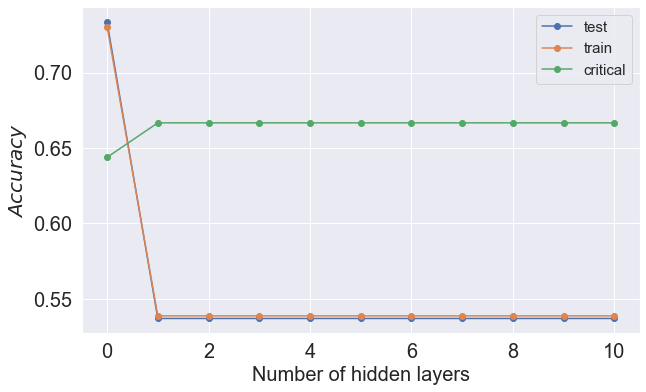

In [62]:
#Plot and save the results
fig, axarr = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
plt.plot(N,accuracy,'-o', label='test')
plt.plot(N,accuracy_train,'-o', label='train')
plt.plot(N,accuracy_crit,'-o', label='critical')

fig = plt.gcf()
fig.set_size_inches(10.0, 6.0)
plt.xlabel('Number of hidden layers',fontsize=20)
plt.ylabel('$Accuracy$',fontsize=20)
plt.legend(fontsize=15)
plt.tick_params(labelsize=20)
plt.show()
fig.savefig("layers_2D.png")

In [98]:
#Dependence on number of epochs
import tensorflow as tf
from tensorflow import keras

N=np.linspace(0,50,num=6)
N[0]=1
accuracy=np.zeros(len(N))
accuracy_train=np.zeros(len(N))
accuracy_crit=np.zeros(len(N))

for i in range(len(N)):
    #Defining the model
    model = keras.Sequential([
            keras.layers.Flatten(input_shape=[L**2]),
            keras.layers.Dense(30, activation='relu'),
            keras.layers.Dense(1, activation='softmax')
            ])
    
    #Compiling the model
    model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])  
    
    # Training the model
    model.fit(X_train, Y_train, epochs=int(N[i]), verbose=0)
    
    #Evaluating the model in test, critical and training data
    test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=0)
    accuracy[i]=test_acc
    
    test_loss, test_acc = model.evaluate(X_critical, Y_critical, verbose=0)
    accuracy_crit[i]=test_acc
    
    test_loss, test_acc = model.evaluate(X_train, Y_train, verbose=0)
    accuracy_train[i]=test_acc
    print('finished computing %i/6 iterations' %(i+1))

finished computing 1/6 iterations
finished computing 2/6 iterations
finished computing 3/6 iterations
finished computing 4/6 iterations
finished computing 5/6 iterations
finished computing 6/6 iterations


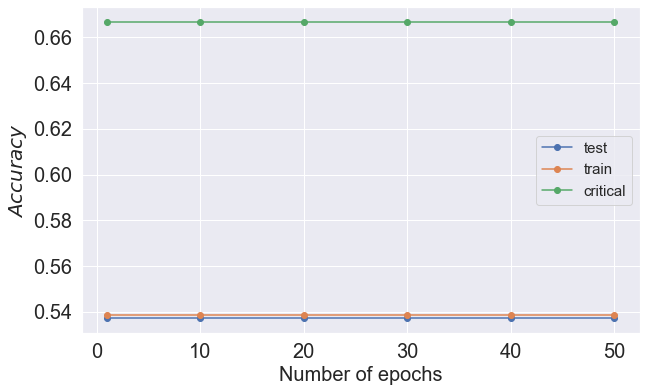

No handles with labels found to put in legend.


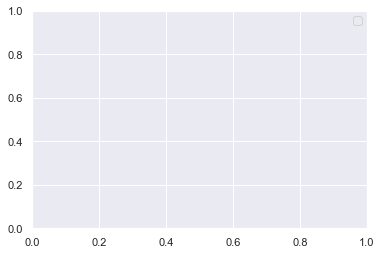

In [99]:
#Plot and save the results
fig, axarr = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
plt.plot(N,accuracy,'-o', label='test')
plt.plot(N,accuracy_train,'-o', label='train')
plt.plot(N,accuracy_crit,'-o', label='critical')

fig = plt.gcf()
fig.set_size_inches(10.0, 6.0)
plt.xlabel('Number of epochs',fontsize=20)
plt.ylabel('$Accuracy$',fontsize=20)
plt.legend(fontsize=15)
plt.tick_params(labelsize=20)
plt.show()
plt.legend()
plt.show()
fig.savefig("epochs_2D.png")

In [ ]:
#Dependence on activation function

act_func = ['elu', 'selu', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'exponential', 'linear']
accuracy=np.zeros(len(act_func))
accuracy_train=np.zeros(len(act_func))
accuracy_crit=np.zeros(len(act_func))

for i in range(len(act_func)):
    #Defining the model
    model = keras.Sequential([
            keras.layers.Flatten(input_shape=[L**2]),
            keras.layers.Dense(30, activation=act_func[i]),
            keras.layers.Dense(1, activation='softmax')
            ])
    
    #Compiling the model
    model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy']) 
    
    # Training the model
    model.fit(X_train, Y_train, epochs=5, verbose=0)
    
    #Evaluating the model in test, critical and training data
    test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=0)
    accuracy[i]=test_acc
    
    test_loss, test_acc = model.evaluate(X_critical, Y_critical, verbose=0)
    accuracy_crit[i]=test_acc
    
    test_loss, test_acc = model.evaluate(X_train, Y_train, verbose=0)
    accuracy_train[i]=test_acc
    print('finished computing %i/8 iterations' %(i+1))

finished computing 1/8 iterations
finished computing 2/8 iterations


In [ ]:
#Plot and save the results
fig, axarr = plt.subplots(nrows=1, ncols=1, figsize=(20,20))
plt.plot(act_func,accuracy,'-o', label='test', linewidth=4, markersize=10)
plt.plot(act_func,accuracy_train,'-o', label='train', linewidth=4, markersize=10)
plt.plot(act_func,accuracy_crit,'-o', label='critical', linewidth=4, markersize=10)

fig = plt.gcf()
plt.xlabel('Function',fontsize=40)
plt.ylabel('$Accuracy$',fontsize=40)
plt.legend(fontsize=25)
plt.tick_params(labelsize=25)

plt.show()
fig.savefig("function_2D.png")